<a href="https://colab.research.google.com/github/Kusuru-Meghana/Non-Invasive-Fibrosis-ML-Pipeline/blob/main/kta_fibrosis_invasive_non_invasive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Non-Invasive Machine Learning Biomarker Discovery Pipeline for Renal Fibrosis**

#Merging (Clinical + Biomarker + Pathology)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import Pandas for Data Manipulation
import pandas as pd

# Load the datasets
clinical_data = pd.read_csv("/content/drive/Shareddrives/Symposium Competition Project/Datasets/Clinical_Data/20250606_OpenAccessClinicalData.csv")
biomarker_data = pd.read_excel("/content/drive/Shareddrives/Symposium Competition Project/Datasets/Plasma_Biomarker_Data/OP-MSDQ120-Plasma Biomarker Data-2024.xlsx")
pathology_data = pd.read_excel("/content/drive/Shareddrives/Symposium Competition Project/Datasets/Pathology_Data/abe70872-78ea-425c-bdce-22361b85e6c3_KPMP TIV Descriptor Scores 03.30.2025.xlsx", sheet_name="Data Table", header=2)

clinical_data.rename(columns={"Participant ID": "Participant_ID"}, inplace=True)
biomarker_data.rename(columns={"Participant ID": "Participant_ID"}, inplace=True)
pathology_data.rename(columns={"Biopsy ID: ": "Participant_ID"}, inplace=True)

# Merged Dataset
merged_final_data = (
    clinical_data
    .merge(biomarker_data, on="Participant_ID", how="inner")
    .merge(pathology_data, on="Participant_ID", how="inner")
)
output_path = "/content/drive/Shareddrives/Symposium Competition Project/Datasets/KTA_merged_data.csv"
merged_final_data.to_csv(output_path, index=False)

print("Merged data shape:", merged_final_data.shape)

# Display the result
merged_final_data.head()


Merged data shape: (129, 230)


,Participant_ID,Tissue Source,Protocol,Sample Type_x,Enrollment Category,Primary Adjudicated Category,Sex,Age (Years) (Binned),Race,KDIGO Stage,...,Consensus Needed (Y/N).26,Capillaritis (0/1/999),Uncertain (Y/N).27,Consensus Needed (Y/N).27,Congestion (0/1/999),Uncertain (Y/N).28,Consensus Needed (Y/N).28,Arteries not well sampled (0/1),Arterioles not well sampled (0/1),NOTES:
0,164-17,KPMP Opportunity Pool HRT Site,HRT Living Donor Protocol,Transplant Pre-perfusion Biopsy,Healthy Reference,NaN,Female,30-39 Years,White,NaN,...,N,0,N,N,0,N,N,0,0,0
1,164-21,KPMP Opportunity Pool HRT Site,HRT Living Donor Protocol,Transplant Pre-perfusion Biopsy,Healthy Reference,NaN,Female,40-49 Years,White,NaN,...,N,0,N,N,0,N,N,1,1,0
2,164-22,KPMP Opportunity Pool HRT Site,HRT Living Donor Protocol,Transplant Pre-perfusion Biopsy,Healthy Reference,NaN,Male,20-29 Years,White,NaN,...,N,0,N,N,0,N,N,1,0,0
3,165-10,KPMP Opportunity Pool HRT Site,HRT Living Donor Protocol,Transplant Pre-perfusion Biopsy,Healthy Reference,NaN,Female,50-59 Years,White,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,165-7,KPMP Opportunity Pool HRT Site,HRT Living Donor Protocol,Transplant Pre-perfusion Biopsy,Healthy Reference,NaN,Male,50-59 Years,Asian,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Cleaning

In [ ]:
# Let's preview the data
merged_final_data.head()

,Participant_ID,Tissue Source,Protocol,Sample Type_x,Enrollment Category,Primary Adjudicated Category,Sex,Age (Years) (Binned),Race,KDIGO Stage,...,Consensus Needed (Y/N).26,Capillaritis (0/1/999),Uncertain (Y/N).27,Consensus Needed (Y/N).27,Congestion (0/1/999),Uncertain (Y/N).28,Consensus Needed (Y/N).28,Arteries not well sampled (0/1),Arterioles not well sampled (0/1),NOTES:
0,164-17,KPMP Opportunity Pool HRT Site,HRT Living Donor Protocol,Transplant Pre-perfusion Biopsy,Healthy Reference,NaN,Female,30-39 Years,White,NaN,...,N,0,N,N,0,N,N,0,0,0
1,164-21,KPMP Opportunity Pool HRT Site,HRT Living Donor Protocol,Transplant Pre-perfusion Biopsy,Healthy Reference,NaN,Female,40-49 Years,White,NaN,...,N,0,N,N,0,N,N,1,1,0
2,164-22,KPMP Opportunity Pool HRT Site,HRT Living Donor Protocol,Transplant Pre-perfusion Biopsy,Healthy Reference,NaN,Male,20-29 Years,White,NaN,...,N,0,N,N,0,N,N,1,0,0
3,165-10,KPMP Opportunity Pool HRT Site,HRT Living Donor Protocol,Transplant Pre-perfusion Biopsy,Healthy Reference,NaN,Female,50-59 Years,White,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,165-7,KPMP Opportunity Pool HRT Site,HRT Living Donor Protocol,Transplant Pre-perfusion Biopsy,Healthy Reference,NaN,Male,50-59 Years,Asian,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Considering the important features for the project

In [ ]:
# Copy the merged data into kta_df dataframe
kta_df = merged_final_data.copy()

# Features
kta_features = [
    'Participant_ID',
    'Enrollment Category',
    'Primary Adjudicated Category',
    'Sex',
    'Age (Years) (Binned)',
    'Race',
    'Baseline eGFR (ml/min/1.73m2)',
    'Proteinuria (mg) (Binned)',
    'A1c (%) (Binned)',
    'Albuminuria (mg) (Binned)',
    'Ang-1 Concentration (pg/mL)',
    'Ang-2 Concentration (pg/mL)',
    'VEGF-A Concentration (pg/mL)',
    'VEGF-C Concentration (pg/mL)',
    'VEGF-D Concentration (pg/mL)',
    'Tie-2 Concentration (pg/mL)',
    'sFlt-1 Concentration (pg/mL)',
    'PlGF Concentration (pg/mL)',
    'bFGF Concentration (pg/mL)',
    'IL-18 Concentration (pg/mL)',
    'KIM-1 Concentration (pg/mL)',
    'MCP-1 Concentration (pg/mL)',
    'IFN-γ Concentration (pg/mL)',
    'IL-1β Concentration (pg/mL)',
    'IL-2 Concentration (pg/mL)',
    'IL-4 Concentration (pg/mL)',
    'IL-6 Concentration (pg/mL)',
    'IL-8 Concentration (pg/mL)',
    'IL-10 Concentration (pg/mL)',
    'IL-12p70 Concentration (pg/mL)',
    'IL-13 Concentration (pg/mL)',
    'TNF-α Concentration (pg/mL)',
    'TNF-RI Concentration (pg/mL)',
    'TNF-RII Concentration (pg/mL)',
    'YKL-40 Concentration (pg/mL)',
    'NGAL Concentration (pg/mL)',
    'Cortex (%): ',
    'Medulla (%): ',
    'Interstitial Fibrosis (%)',
    'Common type (%)',
    'Endocrine type (%)',
    'Tubular Injury (other than atrophy) (%)',
    'Abnormal Luminal Morphology (%)',
    'RBCs (%)',
    'Acellular casts (%)',
    'Cellular casts (%)',
    'Interstitial Monuclear WBCs (%)',
    'Interstitial Foam Cells (%)',
    'M_RBCs (%)',
    'M_Acellular casts (%)',
    'M_Cellular casts (%)',
    'M_Interstitial Monuclear WBCs (%)',
    'M_Interstitial Foam Cells (%)',
    'Tubulointerstitial Amyloidosis (%)'
]

kta_df = kta_df[kta_features]
output_path = "/content/drive/Shareddrives/Symposium Competition Project/Datasets/KTA_Final_df.csv"
kta_df.to_csv(output_path, index=False)

print(kta_df.shape)
kta_df.head()

(129, 54)


,Participant_ID,Enrollment Category,Primary Adjudicated Category,Sex,Age (Years) (Binned),Race,Baseline eGFR (ml/min/1.73m2),Proteinuria (mg) (Binned),A1c (%) (Binned),Albuminuria (mg) (Binned),...,Acellular casts (%),Cellular casts (%),Interstitial Monuclear WBCs (%),Interstitial Foam Cells (%),M_RBCs (%),M_Acellular casts (%),M_Cellular casts (%),M_Interstitial Monuclear WBCs (%),M_Interstitial Foam Cells (%),Tubulointerstitial Amyloidosis (%)
0,164-17,Healthy Reference,NaN,Female,30-39 Years,White,96.200122,<150 mg/g cr,>=8.5%,<30 mg/g cr,...,0,0,0,0,0,0,0,0,0,0
1,164-21,Healthy Reference,NaN,Female,40-49 Years,White,89.649829,500 to <1000 mg/g cr,<6.5%,>=1000 mg/g cr,...,0,0,0,0,0,0,0,0,0,0
2,164-22,Healthy Reference,NaN,Male,20-29 Years,White,120.617909,<150 mg/g cr,<6.5%,30 to <300 mg/g cr,...,0,0,0,0,0,0,0,0,0,0
3,165-10,Healthy Reference,NaN,Female,50-59 Years,White,89.916667,NaN,NaN,<30 mg/g cr,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,165-7,Healthy Reference,NaN,Male,50-59 Years,Asian,106.809398,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Checking Data Types and Inconsistencies

In [ ]:
# Let's analyze the features in detail
print(kta_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 54 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Participant_ID                           129 non-null    object 
 1   Enrollment Category                      129 non-null    object 
 2   Primary Adjudicated Category             123 non-null    object 
 3   Sex                                      129 non-null    object 
 4   Age (Years) (Binned)                     129 non-null    object 
 5   Race                                     129 non-null    object 
 6   Baseline eGFR (ml/min/1.73m2)            129 non-null    float64
 7   Proteinuria (mg) (Binned)                75 non-null     object 
 8   A1c (%) (Binned)                         104 non-null    object 
 9   Albuminuria (mg) (Binned)                94 non-null     object 
 10  Ang-1 Concentration (pg/mL)              129 non-n

From the plasma biomarkers data, we can observe that the following features have inconsistent datatype:

Ang-1 Concentration (pg/mL)
VEGF-C Concentration (pg/mL)
IL-1β Concentration (pg/mL)
IL-2 Concentration (pg/mL)
IL-4 Concentration (pg/mL)
IL-12p70 Concentration (pg/mL)
IL-13 Concentration (pg/mL)
Similarly, all the features in pathology data have inconsistent datatypes.

Let's address them thoroughly...

In [ ]:
plasma_biomarker_features = [
    'Ang-1 Concentration (pg/mL)',
    'Ang-2 Concentration (pg/mL)',
    'VEGF-A Concentration (pg/mL)',
    'VEGF-C Concentration (pg/mL)',
    'VEGF-D Concentration (pg/mL)',
    'Tie-2 Concentration (pg/mL)',
    'sFlt-1 Concentration (pg/mL)',
    'PlGF Concentration (pg/mL)',
    'bFGF Concentration (pg/mL)',
    'IL-18 Concentration (pg/mL)',
    'KIM-1 Concentration (pg/mL)',
    'MCP-1 Concentration (pg/mL)',
    'IFN-γ Concentration (pg/mL)',
    'IL-1β Concentration (pg/mL)',
    'IL-2 Concentration (pg/mL)',
    'IL-4 Concentration (pg/mL)',
    'IL-6 Concentration (pg/mL)',
    'IL-8 Concentration (pg/mL)',
    'IL-10 Concentration (pg/mL)',
    'IL-12p70 Concentration (pg/mL)',
    'IL-13 Concentration (pg/mL)',
    'TNF-α Concentration (pg/mL)',
    'TNF-RI Concentration (pg/mL)',
    'TNF-RII Concentration (pg/mL)',
    'YKL-40 Concentration (pg/mL)',
    'NGAL Concentration (pg/mL)'
]

for feature in plasma_biomarker_features:
    invalid_count = (kta_df[feature] == 'Invalid').sum()
    print(f"Number of 'Invalid' entries in '{feature}': {invalid_count}")

Number of 'Invalid' entries in 'Ang-1 Concentration (pg/mL)': 2
Number of 'Invalid' entries in 'Ang-2 Concentration (pg/mL)': 0
Number of 'Invalid' entries in 'VEGF-A Concentration (pg/mL)': 0
Number of 'Invalid' entries in 'VEGF-C Concentration (pg/mL)': 1
Number of 'Invalid' entries in 'VEGF-D Concentration (pg/mL)': 0
Number of 'Invalid' entries in 'Tie-2 Concentration (pg/mL)': 0
Number of 'Invalid' entries in 'sFlt-1 Concentration (pg/mL)': 0
Number of 'Invalid' entries in 'PlGF Concentration (pg/mL)': 0
Number of 'Invalid' entries in 'bFGF Concentration (pg/mL)': 0
Number of 'Invalid' entries in 'IL-18 Concentration (pg/mL)': 0
Number of 'Invalid' entries in 'KIM-1 Concentration (pg/mL)': 0
Number of 'Invalid' entries in 'MCP-1 Concentration (pg/mL)': 0
Number of 'Invalid' entries in 'IFN-γ Concentration (pg/mL)': 0
Number of 'Invalid' entries in 'IL-1β Concentration (pg/mL)': 52
Number of 'Invalid' entries in 'IL-2 Concentration (pg/mL)': 1
Number of 'Invalid' entries in 'IL-4 C

#### Next, we’ll apply KNN Imputation to features with fewer than 10 inconsistencies and Regression Imputation to those with more than 10 inconsistencies.

In [ ]:
# Import numpy for Mathematical Calculations
# Import sklearn for ML Imputation
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer


plasma_bio_imputation_1 = [
    'Ang-1 Concentration (pg/mL)',
    'VEGF-C Concentration (pg/mL)',
    'IL-2 Concentration (pg/mL)',
    'IL-4 Concentration (pg/mL)',
    'IL-12p70 Concentration (pg/mL)'
]

# Replace 'Invalid' with NaN and convert to numeric
for feature in plasma_bio_imputation_1:
    kta_df[feature] = kta_df[feature].replace('Invalid', np.nan)
    kta_df[feature] = kta_df[feature].infer_objects(copy=False)  # Type casting
    kta_df[feature] = pd.to_numeric(kta_df[feature])


# Perform KNN imputation on Plasma Biomarkers with < 10 inconsistencies
imputer = KNNImputer(n_neighbors=5)
kta_df[plasma_bio_imputation_1] = imputer.fit_transform(kta_df[plasma_bio_imputation_1])

/tmp/ipython-input-1628562211.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  kta_df[feature] = kta_df[feature].replace('Invalid', np.nan)


#### Similarly, we would perform Regression Imputation on Plasma Biomarkers with > 10 inconsistencies.
#### So, we build two regression imputation models for IL-1β Concentration (pg/mL) & IL-13 Concentration (pg/mL)

In [ ]:
# Define predictor and target variables for the first imputation
predictors_il1b = [
    'IL-18 Concentration (pg/mL)',
    'IL-2 Concentration (pg/mL)',
    'IL-4 Concentration (pg/mL)',
    'IL-6 Concentration (pg/mL)',
    'IL-8 Concentration (pg/mL)',
    'IL-10 Concentration (pg/mL)',
    'IL-12p70 Concentration (pg/mL)'
]

# Define predictor and target variables for the second imputation
predictors_il13 = [
    'IL-18 Concentration (pg/mL)',
    'IL-2 Concentration (pg/mL)',
    'IL-4 Concentration (pg/mL)',
    'IL-6 Concentration (pg/mL)',
    'IL-8 Concentration (pg/mL)',
    'IL-10 Concentration (pg/mL)',
    'IL-12p70 Concentration (pg/mL)'
]
target_il1b = 'IL-1β Concentration (pg/mL)'
target_il13 = 'IL-13 Concentration (pg/mL)'


# Replace 'Invalid' with NaN in the target column
kta_df[target_il1b] = kta_df[target_il1b].replace('Invalid', np.nan).infer_objects(copy=False)
kta_df[target_il1b] = kta_df[target_il1b].infer_objects(copy=False)

kta_df[target_il13] = kta_df[target_il13].replace('Invalid', np.nan).infer_objects(copy=False)
kta_df[target_il13] = kta_df[target_il13].infer_objects(copy=False)


# Checking whether the predictor columns are numeric and handle potential NaNs in predictors
# Using SimpleImputer to fill NaNs in predictors with the mean
imputer_predictors_il1b = SimpleImputer(missing_values=np.nan, strategy='mean')
kta_df[predictors_il1b] = imputer_predictors_il1b.fit_transform(kta_df[predictors_il1b])

imputer_predictors_il13 = SimpleImputer(missing_values=np.nan, strategy='mean')
kta_df[predictors_il13] = imputer_predictors_il13.fit_transform(kta_df[predictors_il13])


# Separate data into missing and non-missing for the target variable
il1b_missing = kta_df[kta_df[target_il1b].isna()].copy()
il1b_present = kta_df[kta_df[target_il1b].notna()].copy()

il13_missing = kta_df[kta_df[target_il13].isna()].copy()
il13_present = kta_df[kta_df[target_il13].notna()].copy()


# Convert target column to numeric in the present data
il1b_present[target_il1b] = pd.to_numeric(il1b_present[target_il1b])


### For the missing values in IL-1β and IL-13,

if not il1b_missing.empty:
    # Fit the linear regression model on the data where the target is present
    model_il1b = LinearRegression()
    model_il1b.fit(il1b_present[predictors_il1b], il1b_present[target_il1b])

    # Predict the missing values
    predicted_il1b = model_il1b.predict(il1b_missing[predictors_il1b])

    kta_df.loc[kta_df[target_il1b].isna(), target_il1b] = predicted_il1b

    print(f"Regression imputation performed for '{target_il1b}'.")
else:
    print(f"No missing values found in '{target_il1b}'. No imputation performed.")


if not il13_missing.empty:
    il13_present[target_il13] = pd.to_numeric(il13_present[target_il13])

    # Fit the linear regression model on the data where the target is present
    model_il13 = LinearRegression()
    model_il13.fit(il13_present[predictors_il13], il13_present[target_il13])

    # Predict the missing values
    predicted_il13 = model_il13.predict(il13_missing[predictors_il13])

    kta_df.loc[kta_df[target_il13].isna(), target_il13] = predicted_il13

    print(f"Regression imputation performed for '{target_il13}'.")
else:
    print(f"No missing values found in '{target_il13}'. No imputation performed.")

Regression imputation performed for 'IL-1β Concentration (pg/mL)'.
Regression imputation performed for 'IL-13 Concentration (pg/mL)'.


/tmp/ipython-input-3537939055.py:27: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  kta_df[target_il1b] = kta_df[target_il1b].replace('Invalid', np.nan).infer_objects(copy=False)
/tmp/ipython-input-3537939055.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  kta_df[target_il13] = kta_df[target_il13].replace('Invalid', np.nan).infer_objects(copy=False)


#### Let's address the inconsistencies in Pathology Data...

In [ ]:
# Import the necessary libraries
import numpy as np
import pandas as pd

# Let's check the inconsistencies in Interstitial Fibrosis (%):
kta_df['Interstitial Fibrosis (%)'] = kta_df['Interstitial Fibrosis (%)'].replace('1to4', '2')

# Pathology Parameters
pathology_columns = [
    'Cortex (%): ',
    'Medulla (%): ',
    'Interstitial Fibrosis (%)',
    'Common type (%)',
    'Endocrine type (%)',
    'Tubular Injury (other than atrophy) (%)',
    'Abnormal Luminal Morphology (%)',
    'RBCs (%)',
    'Acellular casts (%)',
    'Cellular casts (%)',
    'Interstitial Monuclear WBCs (%)',
    'Interstitial Foam Cells (%)',
    'M_RBCs (%)',
    'M_Acellular casts (%)',
    'M_Cellular casts (%)',
    'M_Interstitial Monuclear WBCs (%)',
    'M_Interstitial Foam Cells (%)',
    'Tubulointerstitial Amyloidosis (%)'
]

# Convert pathology columns to numeric proportions
for feature in pathology_columns:
    # Replace non-numeric values with NaN and convert to numeric
    kta_df[feature] = pd.to_numeric(kta_df[feature], errors='coerce')

    # Convert percentages to proportions
    kta_df[feature] = kta_df[feature] / 100


In [ ]:
kta_df['Interstitial Fibrosis (%)'].head()

,Interstitial Fibrosis (%)
0,0.050
1,0.000
2,0.025
3,NaN
4,NaN


In [ ]:
# KTA Final Dataset after Imputation
output_path = "/content/drive/Shareddrives/Symposium Competition Project/Datasets/KTA_final_dataset.csv"
kta_df.to_csv(output_path, index=False)

print(" File path:", output_path)
print(" Shape:", kta_df.shape)

 File path: /content/drive/Shareddrives/Symposium Competition Project/Datasets/KTA_final_dataset.csv
 Shape: (129, 54)


In [ ]:
# Let's check the data
import pandas as pd
kta_final = pd.read_csv("/content/drive/Shareddrives/Symposium Competition Project/Datasets/KTA_final_dataset.csv")
kta_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 54 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Participant_ID                           129 non-null    object 
 1   Enrollment Category                      129 non-null    object 
 2   Primary Adjudicated Category             123 non-null    object 
 3   Sex                                      129 non-null    object 
 4   Age (Years) (Binned)                     129 non-null    object 
 5   Race                                     129 non-null    object 
 6   Baseline eGFR (ml/min/1.73m2)            129 non-null    float64
 7   Proteinuria (mg) (Binned)                75 non-null     object 
 8   A1c (%) (Binned)                         104 non-null    object 
 9   Albuminuria (mg) (Binned)                94 non-null     object 
 10  Ang-1 Concentration (pg/mL)              129 non-n

# Data Analysis

In [ ]:
# Basic statistics for numerical columns
print("BASIC STATISTICS")
print("="*50)
numerical_cols = kta_final.select_dtypes(include=[np.number]).columns
print(f"Numerical columns: {len(numerical_cols)}")
print("\nDescriptive statistics:")
print(kta_final[numerical_cols].describe())

# Categorical columns analysis
categorical_cols = kta_final.select_dtypes(include=['object']).columns
print(f"\nCategorical columns: {len(categorical_cols)}")
print("\nCategorical columns summary:")
for col in categorical_cols:
    print(f"\n{col}:")
    print(f"  Unique values: {kta_final[col].nunique()}")
    print(f"  Value counts:")
    print(kta_final[col].value_counts().head())

BASIC STATISTICS
Numerical columns: 45

Descriptive statistics:
       Baseline eGFR (ml/min/1.73m2)  Ang-1 Concentration (pg/mL)  \
count                     129.000000                   129.000000   
mean                       61.515783                  6912.590192   
std                        25.309703                  7345.567249   
min                        27.642979                   242.210292   
25%                        40.868438                  2252.553937   
50%                        54.479288                  4357.179958   
75%                        75.544927                  9631.018915   
max                       129.554000                 45915.645658   

       Ang-2 Concentration (pg/mL)  VEGF-A Concentration (pg/mL)  \
count                   129.000000                    129.000000   
mean                   2248.166282                    130.084002   
std                    1118.969417                    148.551122   
min                     799.306236        

Total biomarker columns: 26


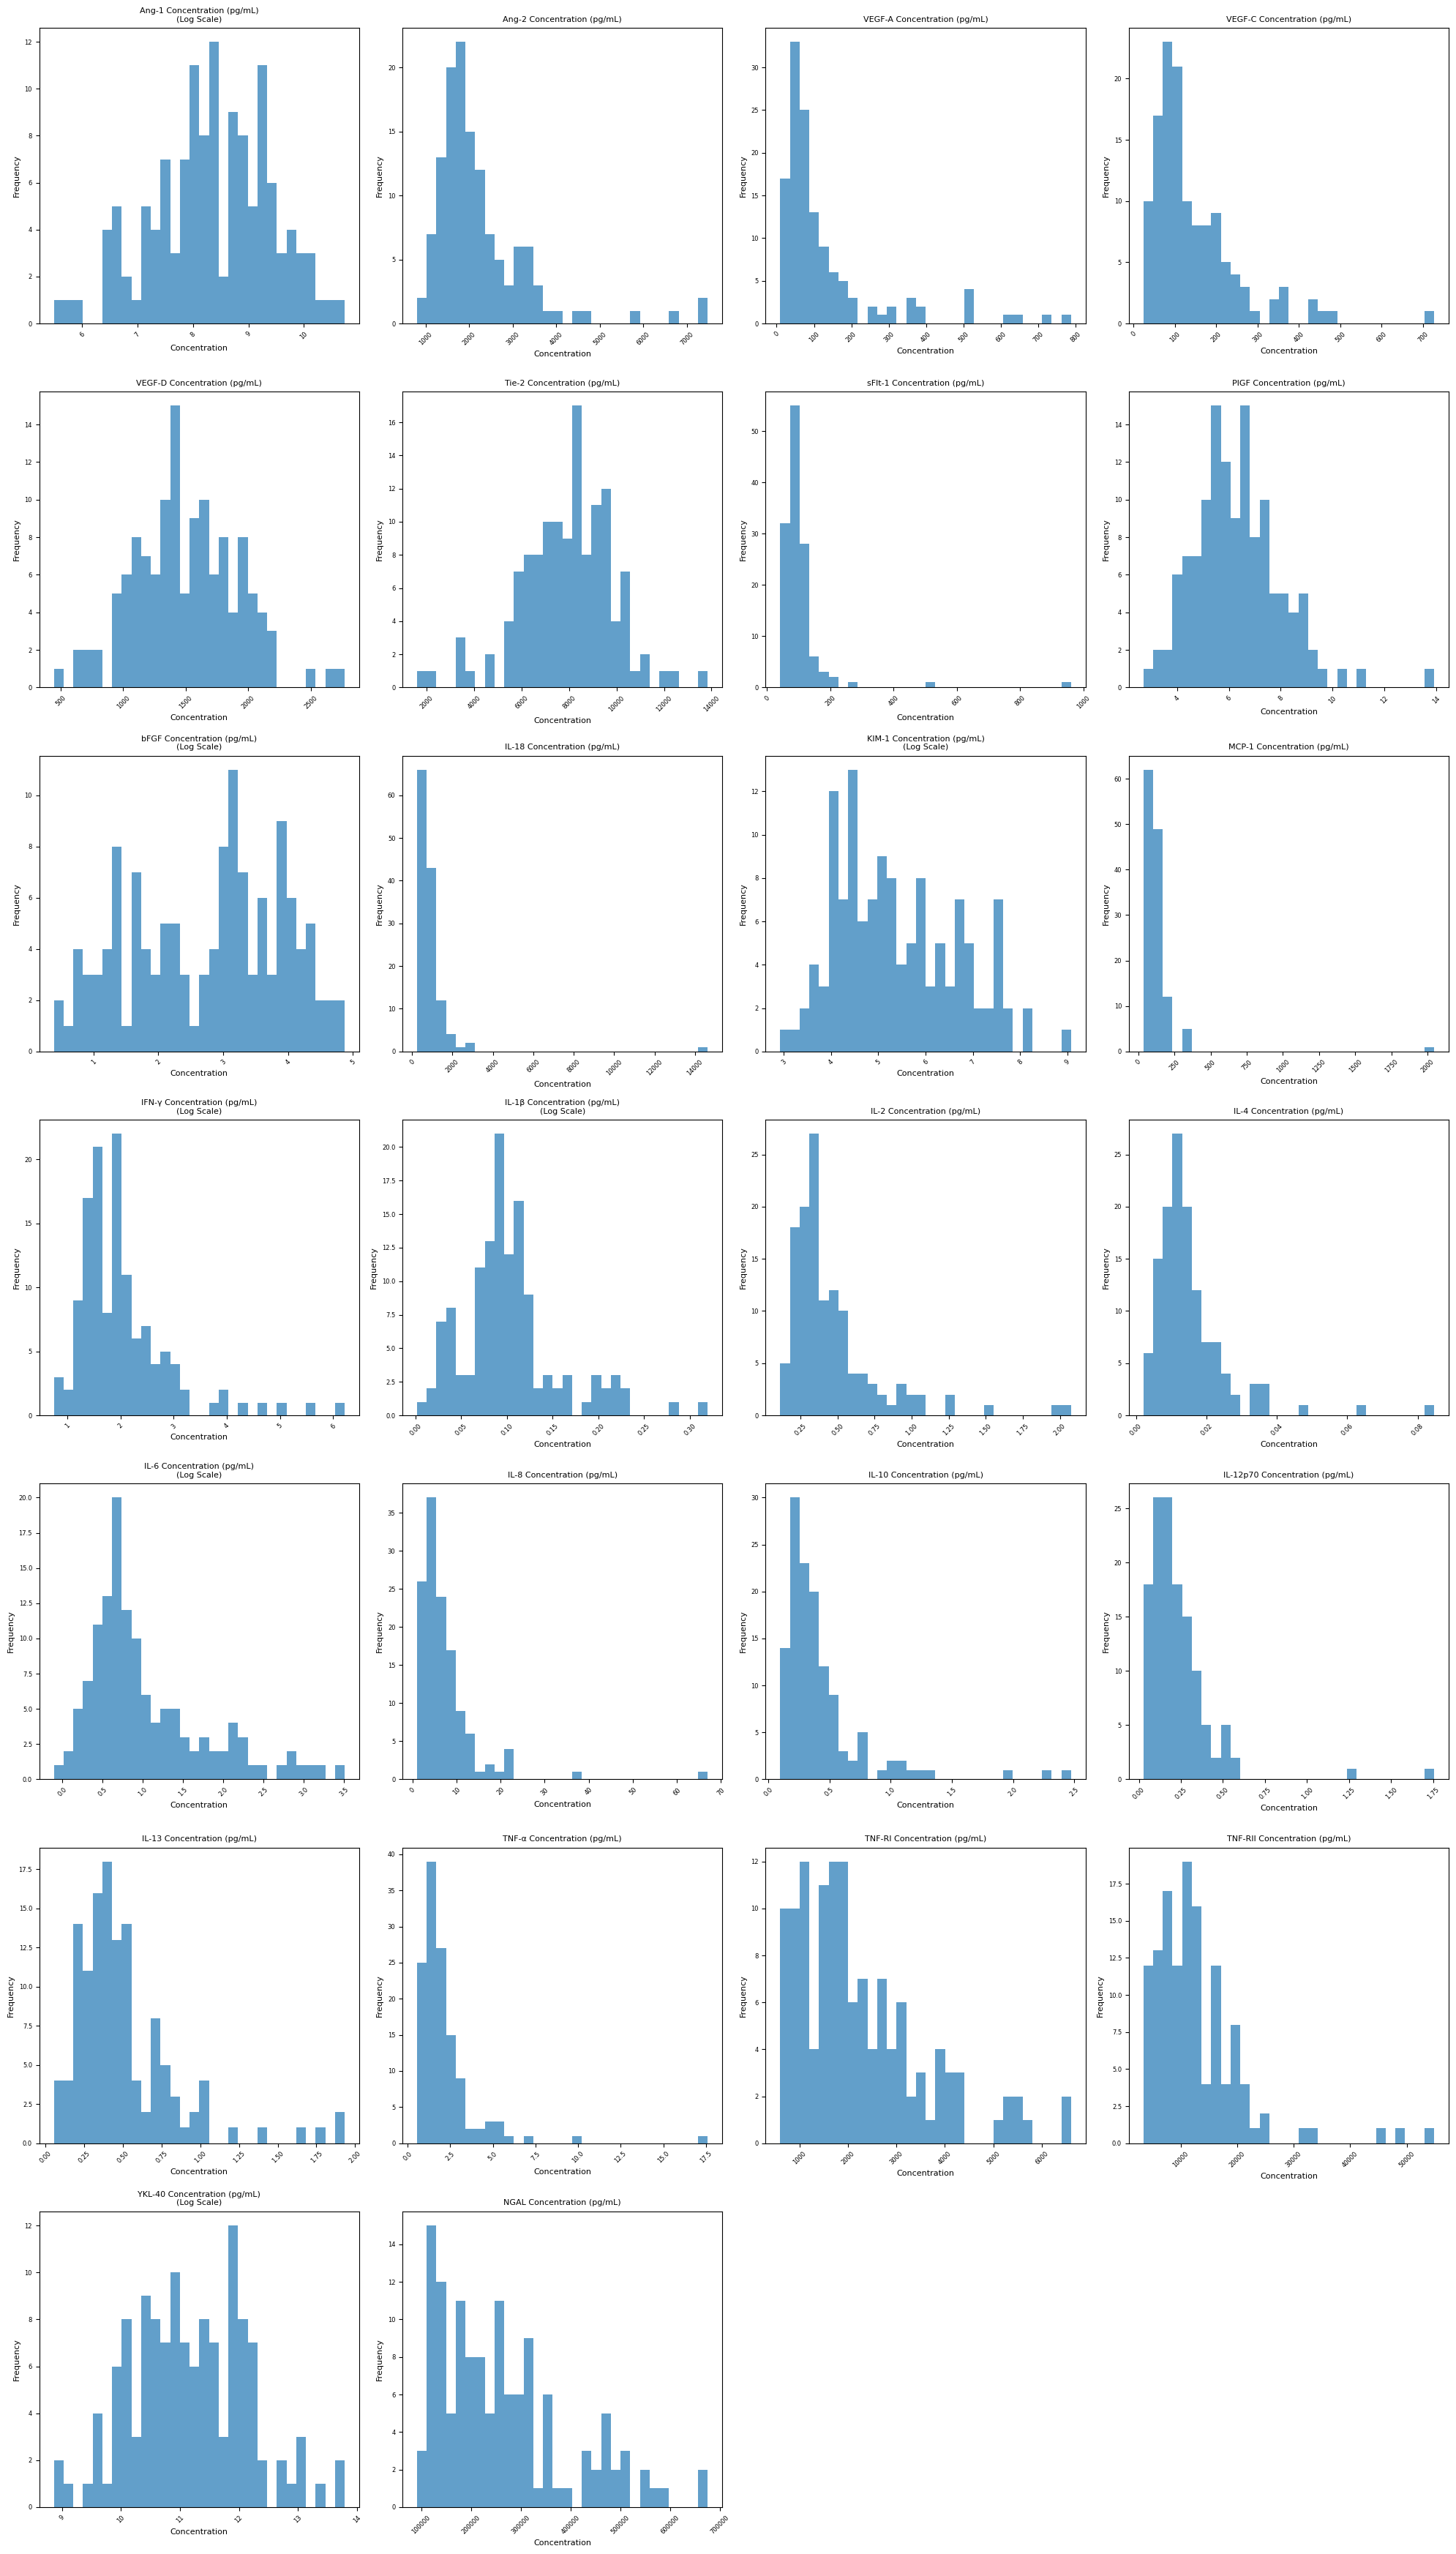

In [ ]:
# Biomarker concentrations distributions
import matplotlib.pyplot as plt
import numpy as np

biomarker_cols = [col for col in kta_final.columns
                  if 'Concentration' in col and kta_final[col].dtype in ['float64', 'int64']]

if biomarker_cols:
    print(f"Total biomarker columns: {len(biomarker_cols)}")

    n_biomarkers = len(biomarker_cols)
    n_cols = 4  # 4 columns
    n_rows = (n_biomarkers + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))

    if n_rows == 1:
        axes = axes.reshape(1, -1) if n_biomarkers > 1 else [axes]
    else:
        axes = axes.flatten()

    for i, col in enumerate(biomarker_cols):
        data = kta_final[col].dropna()
        # Log transform if range is large
        if data.max() > data.min() * 100:
            data = np.log1p(data)  # log1p handles zeros
            axes[i].hist(data, bins=30, alpha=0.7)
            axes[i].set_title(f"{col}\n(Log Scale)", fontsize=8)
        else:
            axes[i].hist(data, bins=30, alpha=0.7)
            axes[i].set_title(col, fontsize=8)

        axes[i].set_xlabel('Concentration', fontsize=8)
        axes[i].set_ylabel('Frequency', fontsize=8)
        axes[i].tick_params(axis='x', rotation=45, labelsize=6)
        axes[i].tick_params(axis='y', labelsize=6)

    for i in range(n_biomarkers, len(axes)):
        axes[i].set_visible(False)

    plt.tight_layout()
    plt.show()
else:
    print("No biomarker concentration columns found.")



Top correlations with Interstitial Fibrosis (%):
Common type (%): 0.935 (positive)
Interstitial Monuclear WBCs (%): 0.738 (positive)
TNF-RI Concentration (pg/mL): 0.594 (positive)
M_Interstitial Monuclear WBCs (%): 0.539 (positive)
TNF-RII Concentration (pg/mL): 0.492 (positive)
NGAL Concentration (pg/mL): 0.456 (positive)
TNF-α Concentration (pg/mL): 0.393 (positive)
Acellular casts (%): 0.354 (positive)
KIM-1 Concentration (pg/mL): 0.353 (positive)
Ang-2 Concentration (pg/mL): 0.345 (positive)


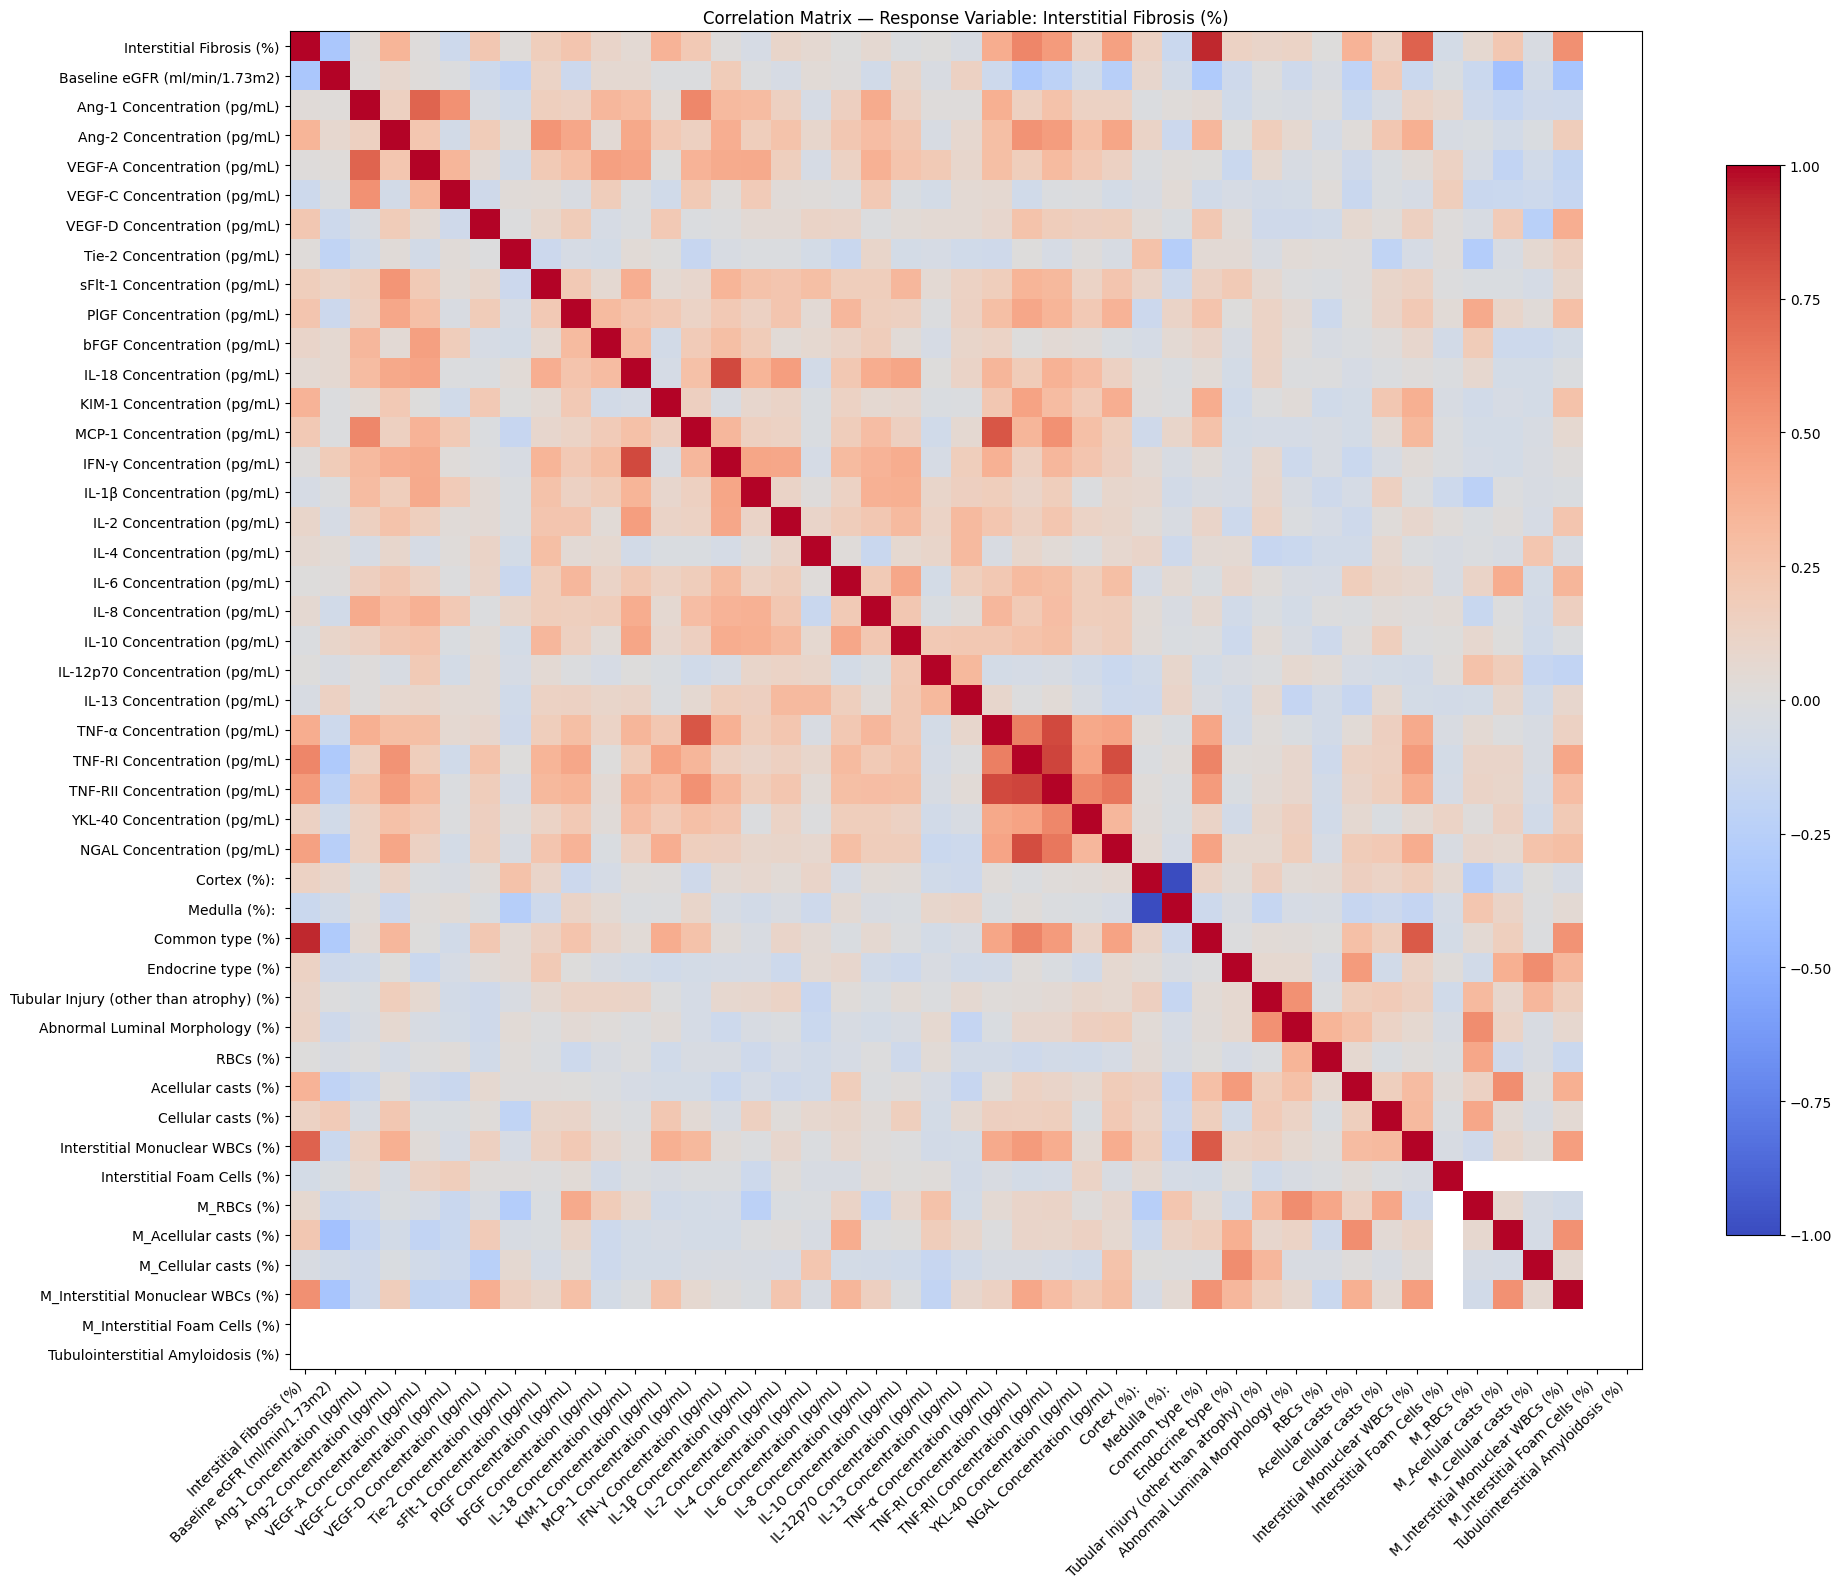


Biomarker correlations with Interstitial Fibrosis (%) (top 10):
TNF-RI Concentration (pg/mL): 0.594 (strong positive)
TNF-RII Concentration (pg/mL): 0.492 (moderate positive)
NGAL Concentration (pg/mL): 0.456 (moderate positive)
TNF-α Concentration (pg/mL): 0.393 (moderate positive)
KIM-1 Concentration (pg/mL): 0.353 (moderate positive)
Ang-2 Concentration (pg/mL): 0.345 (moderate positive)
PlGF Concentration (pg/mL): 0.241 (weak positive)
VEGF-D Concentration (pg/mL): 0.225 (weak positive)
MCP-1 Concentration (pg/mL): 0.210 (weak positive)
sFlt-1 Concentration (pg/mL): 0.170 (weak positive)

Clinical variable correlations with Interstitial Fibrosis (%):
Baseline eGFR (ml/min/1.73m2): -0.323 (moderate negative)

Highly correlated variable pairs (|r| > 0.6):
Cortex (%):  <-> Medulla (%): : -1.000
TNF-RI Concentration (pg/mL) <-> TNF-RII Concentration (pg/mL): 0.846
IL-18 Concentration (pg/mL) <-> IFN-γ Concentration (pg/mL): 0.832
TNF-α Concentration (pg/mL) <-> TNF-RII Concentration (

In [ ]:
# Correlation analysis with Interstitial Fibrosis (%) focus
import matplotlib.pyplot as plt
import numpy as np

if 'Enrollment Category' in kta_final.columns:
    kta_final['Interstitial Fibrosis (%)'] = kta_final['Interstitial Fibrosis (%)']

    numerical_cols = kta_final.select_dtypes(include=[np.number]).columns
    corr_cols = [col for col in numerical_cols if col != 'Interstitial Fibrosis (%)']
    corr_cols = ['Interstitial Fibrosis (%)'] + corr_cols  # Interstitial Fibrosis (%) first

    if len(corr_cols) > 1:
        corr_matrix = kta_final[corr_cols].corr()

        # Focus on Interstitial Fibrosis (%) correlations (first row/column)
        response_correlations = corr_matrix['Interstitial Fibrosis (%)'].drop('Interstitial Fibrosis (%)').sort_values(key=abs, ascending=False)

        print("\nTop correlations with Interstitial Fibrosis (%):")
        print("="*40)
        for var, corr in response_correlations.head(10).items():
            direction = "positive" if corr > 0 else "negative"
            print(f"{var}: {corr:.3f} ({direction})")

        # Plot correlation heatmap
        plt.figure(figsize=(20, 16))

        # Simple correlation heatmap
        im = plt.imshow(corr_matrix, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
        plt.colorbar(im, shrink=0.8)
        plt.title('Correlation Matrix — Response Variable: Interstitial Fibrosis (%)')

        plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=45, ha='right')
        plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)

        plt.tight_layout()
        plt.show()

        # Analyze biomarker correlations with Interstitial Fibrosis (%)
        biomarker_cols = [col for col in corr_cols if 'Concentration' in col]
        if biomarker_cols:
            print(f"\nBiomarker correlations with Interstitial Fibrosis (%) (top 10):")
            biomarker_response_corr = response_correlations[biomarker_cols].sort_values(key=abs, ascending=False)
            for biomarker, corr in biomarker_response_corr.head(10).items():
                direction = "positive" if corr > 0 else "negative"
                strength = "strong" if abs(corr) > 0.5 else "moderate" if abs(corr) > 0.3 else "weak"
                print(f"{biomarker}: {corr:.3f} ({strength} {direction})")

        # Clinical variables correlations with Interstitial Fibrosis (%)
        clinical_cols = [col for col in corr_cols if any(clinical in col for clinical in ['eGFR', 'Proteinuria', 'A1c', 'Albuminuria'])]
        if clinical_cols:
            print(f"\nClinical variable correlations with Interstitial Fibrosis (%):")
            clinical_response_corr = response_correlations[clinical_cols].sort_values(key=abs, ascending=False)
            for clinical, corr in clinical_response_corr.items():
                direction = "positive" if corr > 0 else "negative"
                strength = "strong" if abs(corr) > 0.5 else "moderate" if abs(corr) > 0.3 else "weak"
                print(f"{clinical}: {corr:.3f} ({strength} {direction})")


        # Find highly correlated pairs (excluding Interstitial Fibrosis (%))
        high_corr_pairs = []
        for i in range(1, len(corr_matrix.columns)):  # Skip Interstitial Fibrosis (%)
            for j in range(i+1, len(corr_matrix.columns)):
                corr_val = corr_matrix.iloc[i, j]
                if abs(corr_val) > 0.6:  # High correlation threshold
                    high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_val))

        if high_corr_pairs:
            print(f"\nHighly correlated variable pairs (|r| > 0.6):")
            for var1, var2, corr in sorted(high_corr_pairs, key=lambda x: abs(x[2]), reverse=True):
                print(f"{var1} <-> {var2}: {corr:.3f}")
        else:
            print("\nNo highly correlated pairs found (|r| > 0.6)")
    else:
        print("Not enough numerical columns for correlation analysis.")
else:
    print("Enrollment Category column not found for Interstitial Fibrosis (%) analysis.")

##Summary of Progress
We commenced by integrating data from three primary sources: clinical, biomarker, and pathology files. This process involved matching the data with patient identifiers. Subsequently, we retained only the most pertinent clinical details, molecular biomarkers, and pathology measurements that would be instrumental for our analysis.

To enhance data consistency, we implemented data cleaning measures. This included rectifying inconsistent data types and addressing entries marked as “Invalid.” We employed both K-Nearest Neighbors (KNN) and regression techniques to fill in missing data and ensure the dataset’s completeness.

Next, we converted all percentage values into proportions, facilitating their utilization in modeling. Finally, we exported the cleaned and processed dataset as a readily usable file for further analysis and modeling.

### Spread of Fibrosis(%) across the patients

In [ ]:
import numpy as np
import pandas as pd

# Drop NaN values for calculations
fibrosis = kta_final['Interstitial Fibrosis (%)'].dropna()

# Compute quartiles
percentiles = np.percentile(fibrosis, [25, 50, 75])
print(f"25th: {percentiles[0]:.2f}, 50th: {percentiles[1]:.2f}, 75th: {percentiles[2]:.2f}")

# Bins and labels
bins = [-np.inf, percentiles[0], percentiles[1], percentiles[2], np.inf]
labels = [0, 1, 2, 3]  # 0=Mild, 1=Moderate, 2=Advanced, 3=Severe

kta_final['Fibrosis_Grade'] = pd.cut(kta_final['Interstitial Fibrosis (%)'], bins=bins, labels=labels)

print(kta_final['Fibrosis_Grade'].value_counts().sort_index())

25th: 0.05, 50th: 0.15, 75th: 0.40
Fibrosis_Grade
0    35
1    31
2    37
3    22
Name: count, dtype: int64


In [ ]:
kta_final['Interstitial Fibrosis (%)'].describe()

,Interstitial Fibrosis (%)
count,125.000000
mean,0.239200
std,0.228802
min,0.000000
25%,0.050000
50%,0.150000
75%,0.400000
max,0.950000


- Mild = ≤ 5%               
- Moderate = 5–15%              
- Advanced = 15–40%          
- Severe = > 40%




25% of patients have fibrosis ≤ 5%

50% (median) have fibrosis ≤ 15%

75% have fibrosis ≤ 40%

# Adding a new feature: Fibrosis Class

In [ ]:
# Binary classification label
kta_final['Fibrosis_Class'] = (kta_final['Fibrosis_Grade'] >= 2).astype(int)

# Class balance
print(kta_final['Fibrosis_Class'].value_counts())
print(kta_final['Fibrosis_Class'].value_counts(normalize=True))

Fibrosis_Class
0    70
1    59
Name: count, dtype: int64
Fibrosis_Class
0    0.542636
1    0.457364
Name: proportion, dtype: float64


Note: Balanced target classes ensure the model is not biased toward any particular group.

In [ ]:
clinical_cols = [
    'Baseline eGFR (ml/min/1.73m2)',
    'Proteinuria (mg) (Binned)',
    'A1c (%) (Binned)',
    'Albuminuria (mg) (Binned)',
    'Age (Years) (Binned)',
    'Sex',
    'Race'
]

biomarker_cols = [c for c in kta_final.columns if 'Concentration' in c]

pathology_cols = [
    'Cortex (%): ', 'Medulla (%): ', 'Common type (%)',
    'Endocrine type (%)', 'Tubular Injury (other than atrophy) (%)',
    'Abnormal Luminal Morphology (%)', 'RBCs (%)',
    'Acellular casts (%)', 'Cellular casts (%)',
    'Interstitial Monuclear WBCs (%)', 'Interstitial Foam Cells (%)',
    'M_RBCs (%)', 'M_Acellular casts (%)', 'M_Cellular casts (%)',
    'M_Interstitial Monuclear WBCs (%)', 'M_Interstitial Foam Cells (%)',
    'Tubulointerstitial Amyloidosis (%)'
]


In [ ]:
# Model A (Non-invasive)
X_noninvasive = kta_final[clinical_cols + biomarker_cols]

# Model B (Full with pathology)
X_full = kta_final[clinical_cols + biomarker_cols + pathology_cols]

y = kta_final['Fibrosis_Class']


In [ ]:
# Import Label encoder from Sklearn
from sklearn.preprocessing import LabelEncoder

# For non-numeric columns
non_numeric_cols = X_noninvasive.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)

# For each col
for col in non_numeric_cols:
    le = LabelEncoder()
    X_noninvasive[col] = le.fit_transform(X_noninvasive[col].astype(str))

non_numeric_cols_full = X_full.select_dtypes(include=['object']).columns
for col in non_numeric_cols_full:
    le = LabelEncoder()
    X_full[col] = le.fit_transform(X_full[col].astype(str))


Non-numeric columns: Index(['Proteinuria (mg) (Binned)', 'A1c (%) (Binned)',
       'Albuminuria (mg) (Binned)', 'Age (Years) (Binned)', 'Sex', 'Race'],
      dtype='object')


/tmp/ipython-input-4122614512.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_noninvasive[col] = le.fit_transform(X_noninvasive[col].astype(str))
/tmp/ipython-input-4122614512.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_noninvasive[col] = le.fit_transform(X_noninvasive[col].astype(str))
/tmp/ipython-input-4122614512.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

# Feature Engineering : Based on Correlation Matrix

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd

# Strong predictors of Interstitial Fibrosis (|r| > 0.45)
strong_predictors = [
    'Common type (%)',
    'Interstitial Monuclear WBCs (%)',
    'TNF-RI Concentration (pg/mL)',
    'M_Interstitial Monuclear WBCs (%)',
    'TNF-RII Concentration (pg/mL)',
    'NGAL Concentration (pg/mL)',
    'TNF-α Concentration (pg/mL)'
]

# Moderate predictors (0.25 < |r| < 0.45)
moderate_predictors = [
    'Acellular casts (%)',
    'KIM-1 Concentration (pg/mL)',
    'Ang-2 Concentration (pg/mL)',
    'PlGF Concentration (pg/mL)',
    'VEGF-D Concentration (pg/mL)',
    'MCP-1 Concentration (pg/mL)',
    'sFlt-1 Concentration (pg/mL)',
    'Baseline eGFR (ml/min/1.73m2)'
]

# Combine all selected features
selected_features_list = strong_predictors + moderate_predictors


# Define X and y
X = kta_final.drop(
    columns=['Participant_ID','Enrollment Category','Primary Adjudicated Category','Sex','Age (Years) (Binned)','Race','Patient ID', 'Interstitial Fibrosis (%)',
             'Fibrosis_Grade', 'Fibrosis_Class','Proteinuria (mg) (Binned)','A1c (%) (Binned)','Albuminuria (mg) (Binned)'],
    errors='ignore'
)

y = kta_final['Fibrosis_Class']

# Filter to only selected features if they exist in the dataframe
X = X[[col for col in selected_features_list if col in X.columns]]


print(f"\nSelected features ({len(X.columns)}):")
print(X.columns.tolist())
print(f"\nInitial dataset shape: {X.shape}")
print(f"Target variable shape: {y.shape}")



Selected features (15):
['Common type (%)', 'Interstitial Monuclear WBCs (%)', 'TNF-RI Concentration (pg/mL)', 'M_Interstitial Monuclear WBCs (%)', 'TNF-RII Concentration (pg/mL)', 'NGAL Concentration (pg/mL)', 'TNF-α Concentration (pg/mL)', 'Acellular casts (%)', 'KIM-1 Concentration (pg/mL)', 'Ang-2 Concentration (pg/mL)', 'PlGF Concentration (pg/mL)', 'VEGF-D Concentration (pg/mL)', 'MCP-1 Concentration (pg/mL)', 'sFlt-1 Concentration (pg/mL)', 'Baseline eGFR (ml/min/1.73m2)']

Initial dataset shape: (129, 15)
Target variable shape: (129,)


# Split the dataset for training and testing of an ML model & Scaling the features of the dataset

In [ ]:
# Train/Test data split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42,stratify=y)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"\nTarget balance in train set:\n{y_train.value_counts(normalize=True)}")
print(f"\nTarget balance in test set:\n{y_test.value_counts(normalize=True)}")

Training set shape: (103, 15)
Test set shape: (26, 15)

Target balance in train set:
Fibrosis_Class
0    0.543689
1    0.456311
Name: proportion, dtype: float64

Target balance in test set:
Fibrosis_Class
0    0.538462
1    0.461538
Name: proportion, dtype: float64


In [ ]:
# Build Model A (non-invasive) and Model B (full) datasets
X_noninvasive = kta_final[clinical_cols + biomarker_cols]
X_full = kta_final[clinical_cols + biomarker_cols + pathology_cols]
y = kta_final['Fibrosis_Class']



Non-invasive Model
AUROC: 0.744
              precision    recall  f1-score   support

           0       0.71      0.71      0.71        14
           1       0.67      0.67      0.67        12

    accuracy                           0.69        26
   macro avg       0.69      0.69      0.69        26
weighted avg       0.69      0.69      0.69        26



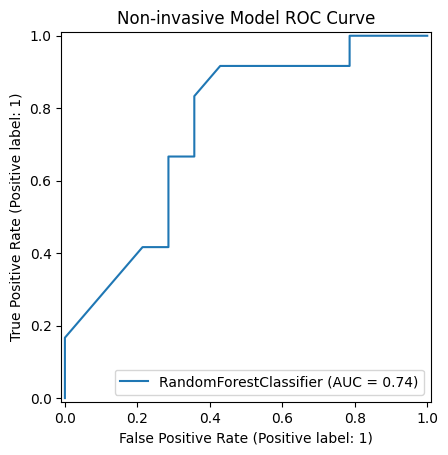


Full (with pathology) Model
AUROC: 0.949
              precision    recall  f1-score   support

           0       0.78      1.00      0.88        14
           1       1.00      0.67      0.80        12

    accuracy                           0.85        26
   macro avg       0.89      0.83      0.84        26
weighted avg       0.88      0.85      0.84        26



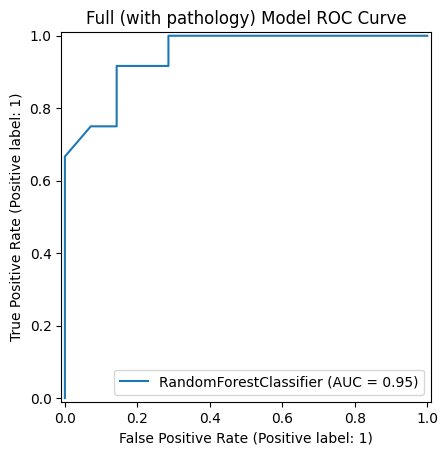

In [ ]:
# Import the necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

models = {'Non-invasive': X_noninvasive, 'Full (with pathology)': X_full}

for name, X in models.items():
    print(f"\n{'='*20}\n{name} Model\n{'='*20}")

    # Apply one-hot encoding to categorical columns
    X_encoded = pd.get_dummies(X, columns=[
        'Proteinuria (mg) (Binned)',
        'A1c (%) (Binned)',
        'Albuminuria (mg) (Binned)',
        'Age (Years) (Binned)',
        'Sex',
        'Race'
    ], dummy_na=False) # Handle missing values explicitly if needed

    X_train, X_test, y_train, y_test = train_test_split(
        X_encoded, y, stratify=y, test_size=0.2, random_state=42
    )

    model = RandomForestClassifier(class_weight='balanced', random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    auc = roc_auc_score(y_test, y_proba)
    print(f"AUROC: {auc:.3f}")
    print(classification_report(y_test, y_pred))

    # Plot ROC
    RocCurveDisplay.from_estimator(model, X_test, y_test)
    plt.title(f"{name} Model ROC Curve")
    plt.show()

In [ ]:
# Standardizing the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrames for interpretability
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print(f"Training set: Mean: {X_train_scaled.mean().mean():.4f}, Std: {X_train_scaled.std().mean():.4f}")
print(f"Test set: Mean: {X_test_scaled.mean().mean():.4f}, Std: {X_test_scaled.std().mean():.4f}")


Training set: Mean: -0.0000, Std: 0.9781
Test set: Mean: 0.0208, Std: 0.9203


# Train a Random Forest Classifier

In [ ]:
# Import Random Forest Classifier from Sklearn
from sklearn.ensemble import RandomForestClassifier

kta_rf = RandomForestClassifier(
    n_estimators=50,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1,
    class_weight='balanced'
)

kta_rf.fit(X_train_scaled, y_train)
print("Random Forest Classifier trained successfully")

Random Forest Classifier trained successfully


# RF Classifier Evaluation & Analysis

In [ ]:
# Import evaluation metrics from Sklearn
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predictions on KTA RF Classifier
y_pred = kta_rf.predict(X_test_scaled)
y_pred_proba = kta_rf.predict_proba(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"\nAccuracy: {round(accuracy, 4)}")
print(f"\nConfusion Matrix:\n{conf_matrix}")
print(f"\nClassification Report:\n{class_report}")

# Contributing features to the Fibrosis Class
importances = pd.Series(kta_rf.feature_importances_, index=X_train_scaled.columns)
top_features = importances.sort_values(ascending=False).head(15)

print(f"\nTop 15 Most Important Features:")
for idx, (feature, importance) in enumerate(top_features.items(), 1):
    print(f"{idx:2d}. {feature:45s} : {importance:.4f}")



Accuracy: 0.8846

Confusion Matrix:
[[14  0]
 [ 3  9]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90        14
           1       1.00      0.75      0.86        12

    accuracy                           0.88        26
   macro avg       0.91      0.88      0.88        26
weighted avg       0.90      0.88      0.88        26


Top 15 Most Important Features:
 1. Common type (%)                               : 0.2404
 2. Interstitial Monuclear WBCs (%)               : 0.0553
 3. TNF-RI Concentration (pg/mL)                  : 0.0487
 4. KIM-1 Concentration (pg/mL)                   : 0.0452
 5. Baseline eGFR (ml/min/1.73m2)                 : 0.0349
 6. NGAL Concentration (pg/mL)                    : 0.0347
 7. TNF-α Concentration (pg/mL)                   : 0.0314
 8. TNF-RII Concentration (pg/mL)                 : 0.0305
 9. VEGF-D Concentration (pg/mL)                  : 0.0234
10. PlGF Concentration (pg/mL

In [ ]:
# Cross Evaluation Score
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(kta_rf, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation accuracies:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean().round(3))

Cross-validation accuracies: [0.80952381 0.71428571 0.95238095 0.9        0.7       ]
Mean CV accuracy: 0.815


#Visualization

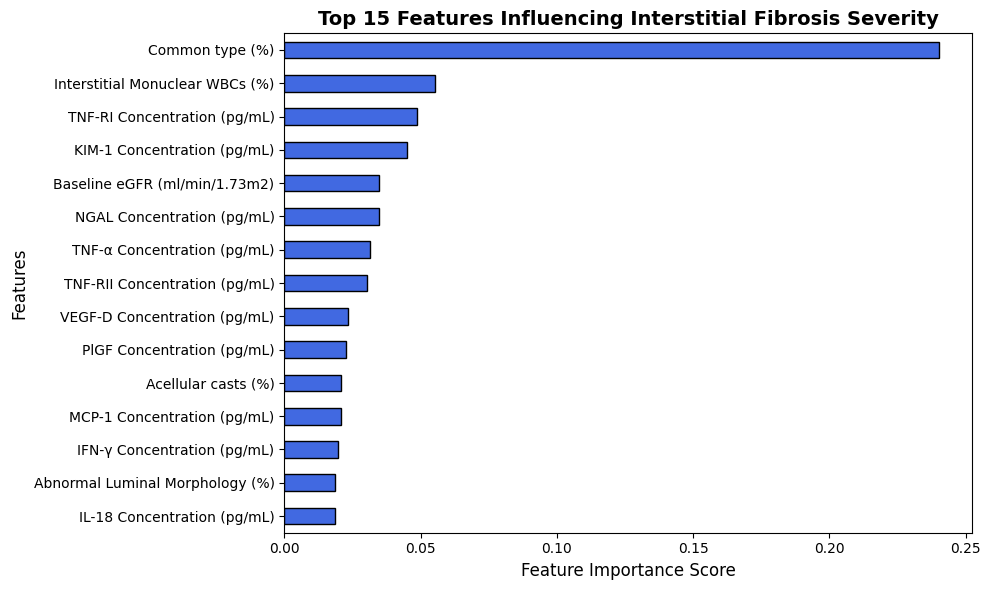

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Top 15 features
fig, ax = plt.subplots(figsize=(10, 6))
top_features.plot(kind='barh', color='royalblue', edgecolor='black', ax=ax)
ax.set_xlabel('Feature Importance Score', fontsize=12)
ax.set_ylabel('Features', fontsize=12)
ax.set_title('Top 15 Features Influencing Interstitial Fibrosis Severity', fontsize=14, fontweight='bold')
ax.invert_yaxis()
plt.tight_layout()
plt.show()


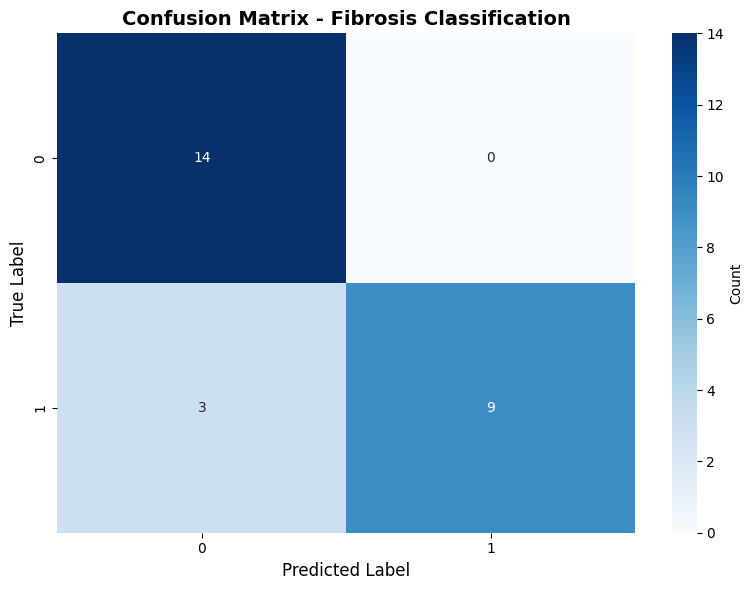

In [ ]:
# Confusion Matrix: RF Classifier
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(y.unique()),
            yticklabels=sorted(y.unique()),
            cbar_kws={'label': 'Count'},
            ax=ax)
ax.set_xlabel('Predicted Label', fontsize=12)
ax.set_ylabel('True Label', fontsize=12)
ax.set_title('Confusion Matrix - Fibrosis Classification', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Let's compare our RF Classifier with XGBoost...

##XGBoost

In [ ]:
# Import XGBoost Classifier
from xgboost import XGBClassifier
import re

# Function to clean column names
def clean_col_names(df):
    cols = df.columns
    new_cols = []
    for col in cols:
        new_col = re.sub(r'\[|\]|<', '', col) # Remove [ ] and <
        new_col = new_col.replace(' ', '_') # Replace spaces with underscores
        new_col = re.sub(r'[^A-Za-z0-9_]+', '', new_col) # Remove any other invalid characters
        new_cols.append(new_col)
    df.columns = new_cols
    return df

# Clean column names in scaled dataframes
X_train_scaled = clean_col_names(X_train_scaled.copy())
X_test_scaled = clean_col_names(X_test_scaled.copy())


kta_xgb = XGBClassifier(
    n_estimators=50,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss',
    n_jobs=-1,
    verbose=0
)

kta_xgb.fit(X_train_scaled, y_train)
print("\nXGBoost Classifier trained successfully")
print(f"Model parameters: {kta_xgb.get_params()}")


XGBoost Classifier trained successfully
Model parameters: {'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.8, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': 'logloss', 'feature_types': None, 'feature_weights': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.05, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 4, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 50, 'n_jobs': -1, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': 0.8, 'tree_method': None, 'validate_parameters': None, 'verbosity': None, 'verbose': 0}


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [20:29:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
# Predictions:
y_pred_xgb = kta_xgb.predict(X_test_scaled)
y_pred_proba_xgb = kta_xgb.predict_proba(X_test_scaled)

print(f"Predictions shape: {y_pred_xgb.shape}")
print(f"Prediction probabilities shape: {y_pred_proba_xgb.shape}")

Predictions shape: (26,)
Prediction probabilities shape: (26, 2)


#### XGBoost Classifier Evaluation & Analysis

In [ ]:
# Import evaluation metrics from Sklearn
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb, average='weighted', zero_division=0)
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted', zero_division=0)
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted', zero_division=0)
class_report_xgb = classification_report(y_test, y_pred_xgb, zero_division=0)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

print(f"\nAccuracy:  {round(accuracy_xgb, 4)}")
print(f"Precision: {round(precision_xgb, 4)}")
print(f"Recall:    {round(recall_xgb, 4)}")
print(f"F1-Score:  {round(f1_xgb, 4)}")
print(f"\n{conf_matrix_xgb}")
print(f"\n{class_report_xgb}")


# Contributing features to the Fibrosis Class
importances_xgb = pd.Series(kta_xgb.feature_importances_, index=X_train_scaled.columns)
top_features_xgb = importances_xgb.sort_values(ascending=False).head(15)

print(f"\nTop 15 Most Important Features:")
for idx, (feature, importance) in enumerate(top_features_xgb.items(), 1):
    print(f"{idx:2d}. {feature:45s} - {importance:.4f}")


Accuracy:  0.9615
Precision: 0.9641
Recall:    0.9615
F1-Score:  0.9614

[[14  0]
 [ 1 11]]

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.92      0.96        12

    accuracy                           0.96        26
   macro avg       0.97      0.96      0.96        26
weighted avg       0.96      0.96      0.96        26


Top 15 Most Important Features:
 1. Common_type_                                  - 0.1246
 2. Albuminuria_mg_Binned_30_mgg_cr               - 0.0483
 3. Interstitial_Monuclear_WBCs_                  - 0.0482
 4. TNFRII_Concentration_pgmL                     - 0.0463
 5. Sex_Female                                    - 0.0460
 6. Race_Other                                    - 0.0385
 7. KIM1_Concentration_pgmL                       - 0.0385
 8. Albuminuria_mg_Binned_30_to_300_mgg_cr        - 0.0339
 9. Age_Years_Binned_7079_Years                   - 0.0313
10. TNFRI_Conce

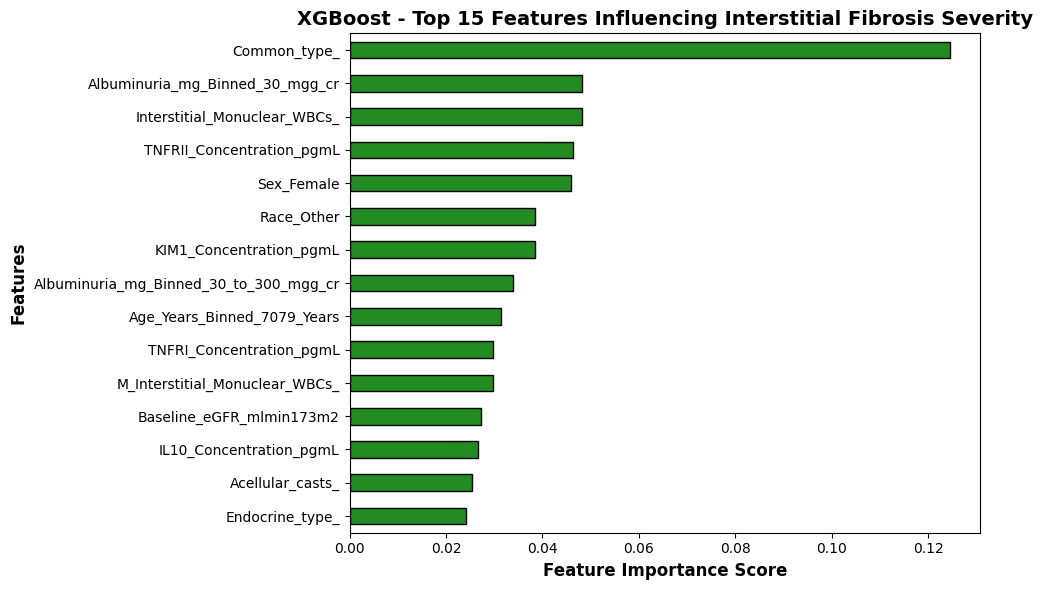

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
top_features_xgb.plot(kind='barh', color='forestgreen', edgecolor='black', ax=ax)
ax.set_xlabel('Feature Importance Score', fontsize=12, fontweight='bold')
ax.set_ylabel('Features', fontsize=12, fontweight='bold')
ax.set_title('XGBoost - Top 15 Features Influencing Interstitial Fibrosis Severity',
             fontsize=14, fontweight='bold')
ax.invert_yaxis()
plt.tight_layout()
plt.show()

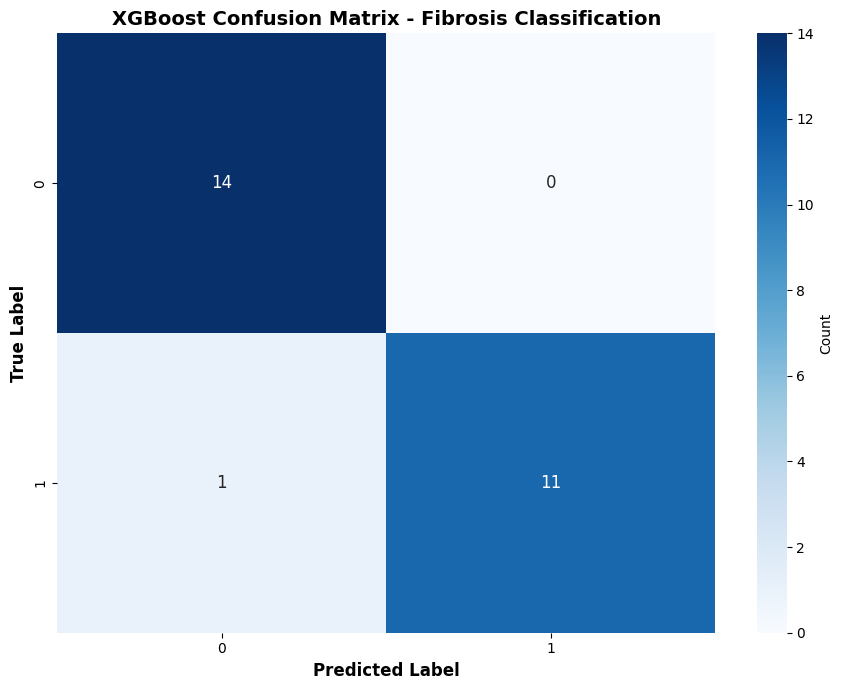

In [ ]:
fig, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(y_test.unique()),
            yticklabels=sorted(y_test.unique()),
            cbar_kws={'label': 'Count'},
            ax=ax,
            annot_kws={'size': 12})
ax.set_xlabel('Predicted Label', fontsize=12, fontweight='bold')
ax.set_ylabel('True Label', fontsize=12, fontweight='bold')
ax.set_title('XGBoost Confusion Matrix - Fibrosis Classification', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Comparison of Fibrosis Classifier

In [ ]:
# Import the necessary libraries
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Random Forest Metrics
accuracy_rf = accuracy_score(y_test, y_pred)
precision_rf = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall_rf = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1_rf = f1_score(y_test, y_pred, average='weighted', zero_division=0)

# XGBoost Metrics
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb, average='weighted', zero_division=0)
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted', zero_division=0)
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted', zero_division=0)


# Create a comparison dataframe
comparison_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],   # Type of evaluation metric
    'Random Forest': [accuracy_rf, precision_rf, recall_rf, f1_rf],
    'XGBoost': [accuracy_xgb, precision_xgb, recall_xgb, f1_xgb]
})
comparison_df['Difference (RF - XGB)'] = comparison_df['Random Forest'] - comparison_df['XGBoost']
comparison_df['Better Model'] = comparison_df['Difference (RF - XGB)'].apply(lambda x: 'Random Forest' if x > 0 else ('XGBoost' if x < 0 else 'Tie'))

print("Evaluation: RF vs XGBost")
print(comparison_df.to_string(index=False))

print(f"\nAccuracy:")
print(f"  Random Forest: {accuracy_rf:.4f}")
print(f"  XGBoost:      {accuracy_xgb:.4f}")
print(f"  Difference:   {abs(accuracy_rf - accuracy_xgb):.4f}")
print(f"  Best Classifier: {'Random Forest' if accuracy_rf > accuracy_xgb else 'XGBoost' if accuracy_xgb > accuracy_rf else 'Tie'}")

print(f"\nPrecision:")
print(f"  Random Forest: {precision_rf:.4f}")
print(f"  XGBoost:      {precision_xgb:.4f}")
print(f"  Difference:   {abs(precision_rf - precision_xgb):.4f}")
print(f"  Best Classifier: {'Random Forest' if precision_rf > precision_xgb else 'XGBoost' if precision_xgb > precision_rf else 'Tie'}")

print(f"\nRecall:")
print(f"  Random Forest: {recall_rf:.4f}")
print(f"  XGBoost:      {recall_xgb:.4f}")
print(f"  Difference:   {abs(recall_rf - recall_xgb):.4f}")
print(f"  Best Classifier: {'Random Forest' if recall_rf > recall_xgb else 'XGBoost' if recall_xgb > recall_rf else 'Tie'}")

print(f"\nF1-Score:")
print(f"  Random Forest: {f1_rf:.4f}")
print(f"  XGBoost:      {f1_xgb:.4f}")
print(f"  Difference:   {abs(f1_rf - f1_xgb):.4f}")
print(f"  Best Classifier: {'Random Forest' if f1_rf > f1_xgb else 'XGBoost' if f1_xgb > f1_rf else 'Tie'}")


Evaluation: RF vs XGBost
   Metric  Random Forest  XGBoost  Difference (RF - XGB) Better Model
 Accuracy       0.884615 0.961538              -0.076923      XGBoost
Precision       0.904977 0.964103              -0.059125      XGBoost
   Recall       0.884615 0.961538              -0.076923      XGBoost
 F1-Score       0.881957 0.961365              -0.079409      XGBoost

Accuracy:
  Random Forest: 0.8846
  XGBoost:      0.9615
  Difference:   0.0769
  Best Classifier: XGBoost

Precision:
  Random Forest: 0.9050
  XGBoost:      0.9641
  Difference:   0.0591
  Best Classifier: XGBoost

Recall:
  Random Forest: 0.8846
  XGBoost:      0.9615
  Difference:   0.0769
  Best Classifier: XGBoost

F1-Score:
  Random Forest: 0.8820
  XGBoost:      0.9614
  Difference:   0.0794
  Best Classifier: XGBoost


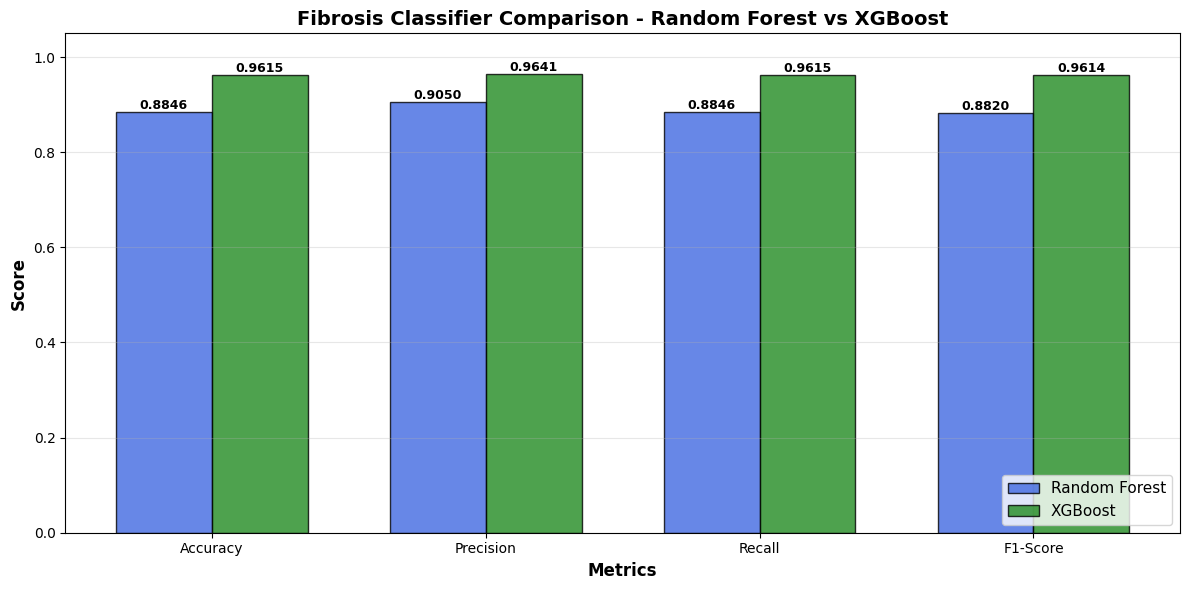

In [ ]:
# Import seaborn & matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(12, 6))

x = range(len(comparison_df))
width = 0.35

bars1 = ax.bar([i - width/2 for i in x], comparison_df['Random Forest'], width,
               label='Random Forest', color='royalblue', edgecolor='black', alpha=0.8)
bars2 = ax.bar([i + width/2 for i in x], comparison_df['XGBoost'], width,
               label='XGBoost', color='forestgreen', edgecolor='black', alpha=0.8)

ax.set_ylabel('Score', fontsize=12, fontweight='bold')
ax.set_xlabel('Metrics', fontsize=12, fontweight='bold')
ax.set_title('Fibrosis Classifier Comparison - Random Forest vs XGBoost', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(comparison_df['Metric'])
ax.set_ylim(0, 1.05)
ax.legend(fontsize=11, loc='lower right')
ax.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.4f}',
                ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
# Get top 10 features from both models
top_rf_features = pd.Series(kta_rf.feature_importances_, index=X_train_scaled.columns).sort_values(ascending=False).head(10)
top_xgb_features = pd.Series(kta_xgb.feature_importances_, index=X_train_scaled.columns).sort_values(ascending=False).head(10)

print("\nTop 10 Features - Random Forest:")
for idx, (feature, importance) in enumerate(top_rf_features.items(), 1):
    print(f"{idx:2d}. {feature:45s} - {importance:.4f}")

print("\nTop 10 Features - XGBoost:")
for idx, (feature, importance) in enumerate(top_xgb_features.items(), 1):
    print(f"{idx:2d}. {feature:45s} - {importance:.4f}")

# Find common top features
common_features = set(top_rf_features.index) & set(top_xgb_features.index)
print(f"\nCommon features in top 10: {len(common_features)}")
print(f"Features: {sorted(common_features)}")



Top 10 Features - Random Forest:
 1. Common_type_                                  - 0.2404
 2. Interstitial_Monuclear_WBCs_                  - 0.0553
 3. TNFRI_Concentration_pgmL                      - 0.0487
 4. KIM1_Concentration_pgmL                       - 0.0452
 5. Baseline_eGFR_mlmin173m2                      - 0.0349
 6. NGAL_Concentration_pgmL                       - 0.0347
 7. TNF_Concentration_pgmL                        - 0.0314
 8. TNFRII_Concentration_pgmL                     - 0.0305
 9. VEGFD_Concentration_pgmL                      - 0.0234
10. PlGF_Concentration_pgmL                       - 0.0228

Top 10 Features - XGBoost:
 1. Common_type_                                  - 0.1246
 2. Albuminuria_mg_Binned_30_mgg_cr               - 0.0483
 3. Interstitial_Monuclear_WBCs_                  - 0.0482
 4. TNFRII_Concentration_pgmL                     - 0.0463
 5. Sex_Female                                    - 0.0460
 6. Race_Other                                    - 0

##SHAP Feature Importance

- High SHAP value (red --> right shift) = higher risk of severe fibrosis.

- Low SHAP value (blue --> left shift) = protective or lower-risk biomarker level.

 SHAP values shape: (26, 74)
 X_test shape: (26, 74)


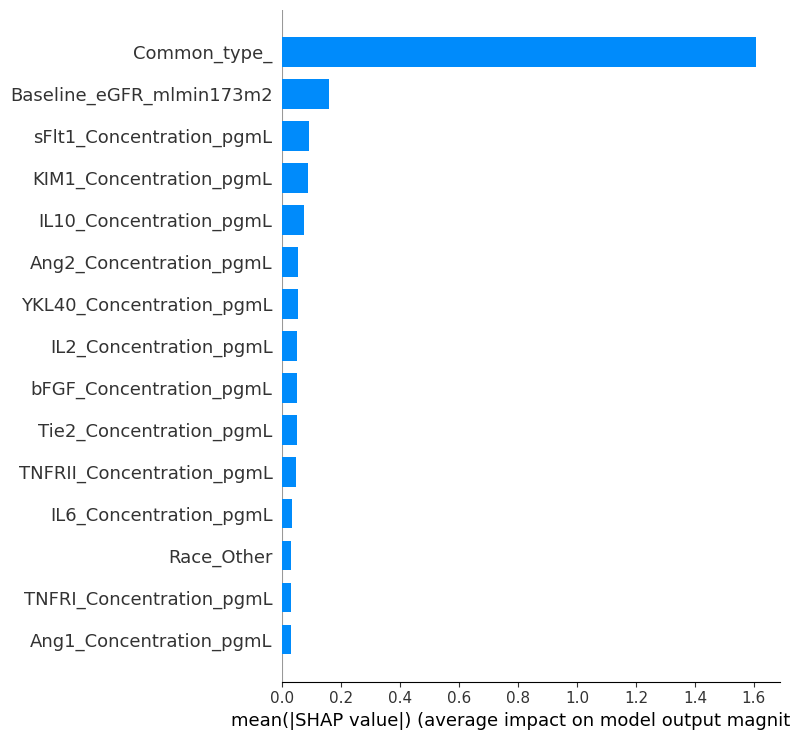

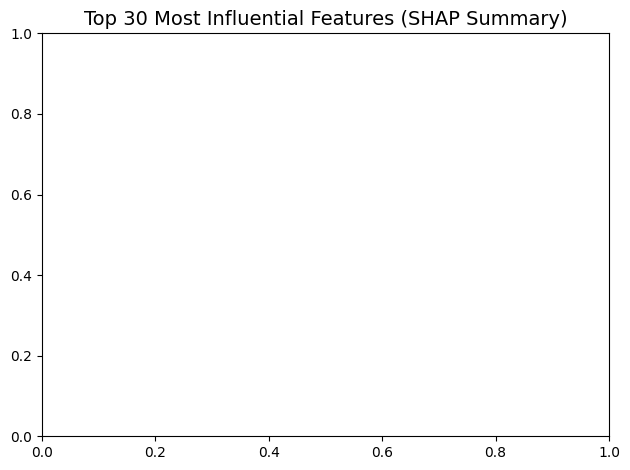

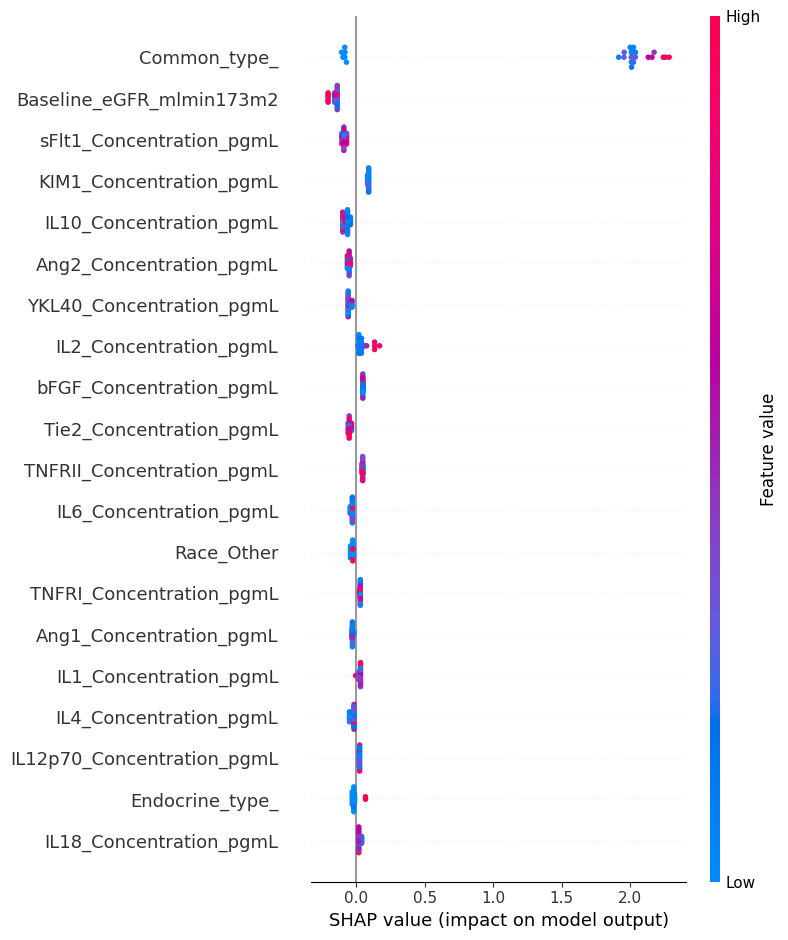


Top 30 features:


,Feature,Mean_SHAP_Impact
29,Common_type_,1.608260
0,Baseline_eGFR_mlmin173m2,0.158716
7,sFlt1_Concentration_pgmL,0.089206
11,KIM1_Concentration_pgmL,0.088122
19,IL10_Concentration_pgmL,0.073763
2,Ang2_Concentration_pgmL,0.052461
25,YKL40_Concentration_pgmL,0.052397
15,IL2_Concentration_pgmL,0.049646
9,bFGF_Concentration_pgmL,0.048772
6,Tie2_Concentration_pgmL,0.048708


<Figure size 640x480 with 0 Axes>

In [ ]:
# Import the necessary libraries
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

def clean_col_names(df):
    cols = df.columns
    new_cols = []
    for col in cols:
        new_col = re.sub(r'\[|\]|<', '', col)
        new_col = new_col.replace(' ', '_')
        new_col = re.sub(r'[^A-Za-z0-9_]+', '', new_col)
        new_cols.append(new_col)
    df.columns = new_cols
    return df

X_test_cleaned = clean_col_names(X_test.copy())


# SHAP explainer for the trained model
explainer = shap.TreeExplainer(kta_xgb)
shap_vals = explainer.shap_values(X_test_cleaned)

if isinstance(shap_vals, list):
    shap_vals = shap_vals[1]

print(" SHAP values shape:", shap_vals.shape)
print(" X_test shape:", X_test_cleaned.shape)

shap.summary_plot(shap_vals, X_test_cleaned, plot_type="bar", max_display=15)
plt.title("Top 30 Most Influential Features (SHAP Summary)", fontsize=14)
plt.tight_layout()
plt.show()

shap.summary_plot(shap_vals, X_test_cleaned)
plt.tight_layout()

shap_importance = np.abs(shap_vals).mean(axis=0)

# Binary classifier returns per-class values
if shap_importance.ndim > 1:
    shap_importance = shap_importance[:, 0]

shap_ranking = pd.DataFrame({
    'Feature': X_test_cleaned.columns,
    'Mean_SHAP_Impact': shap_importance.flatten()  # ensure 1D array
}).sort_values('Mean_SHAP_Impact', ascending=False)

# Top 30 features
top_features = shap_ranking.head(10)
top_features.to_csv("/content/drive/Shareddrives/Symposium Competition Project/top_SHAP_features.csv", index=False)

print("\nTop 30 features:")
display(top_features.head(30))

Fibrosis severity is primarily driven by tissue-level changes (Common type, casts, WBC infiltration)-supported by elevated inflammatory cytokines (TNF-RII, IL-6, IL-13), tubular injury markers (KIM-1, YKL-40), and pro-angiogenic signaling (VEGF family)

#SHAP for RandomForest & XGBoost


=== Non-invasive — Random Forest ===
Plotting SHAP summary...


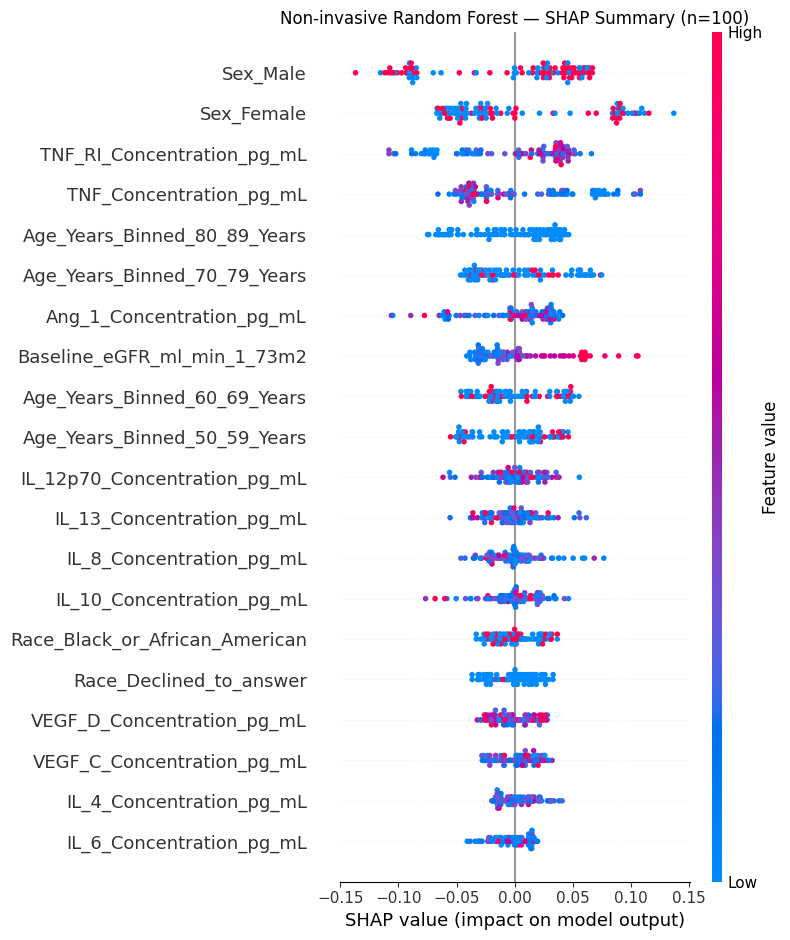

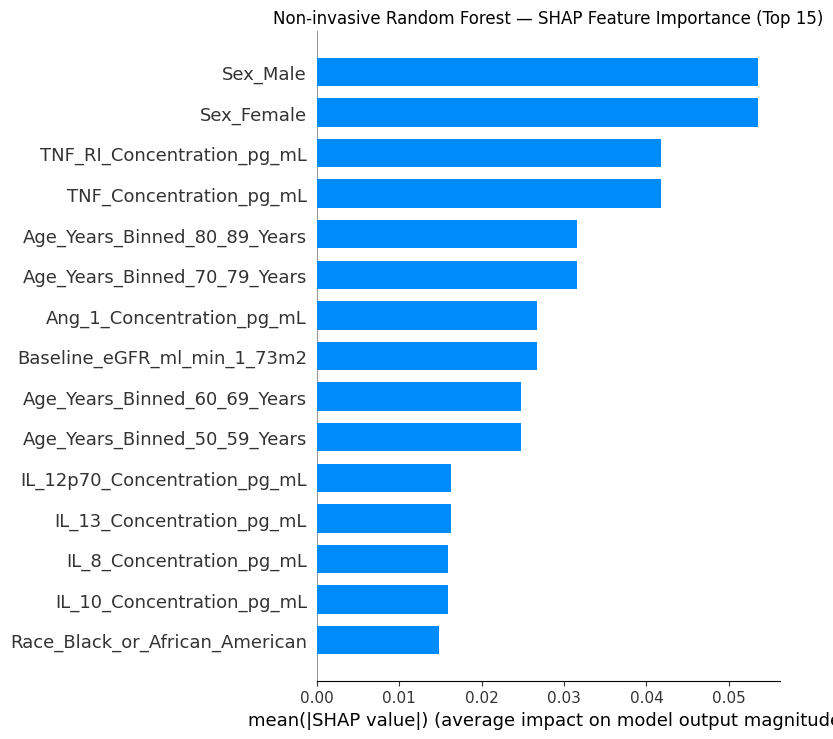

Saved: Non-invasive_Random_Forest_SHAP_Features.csv

=== Non-invasive — XGBoost ===
Plotting SHAP summary...


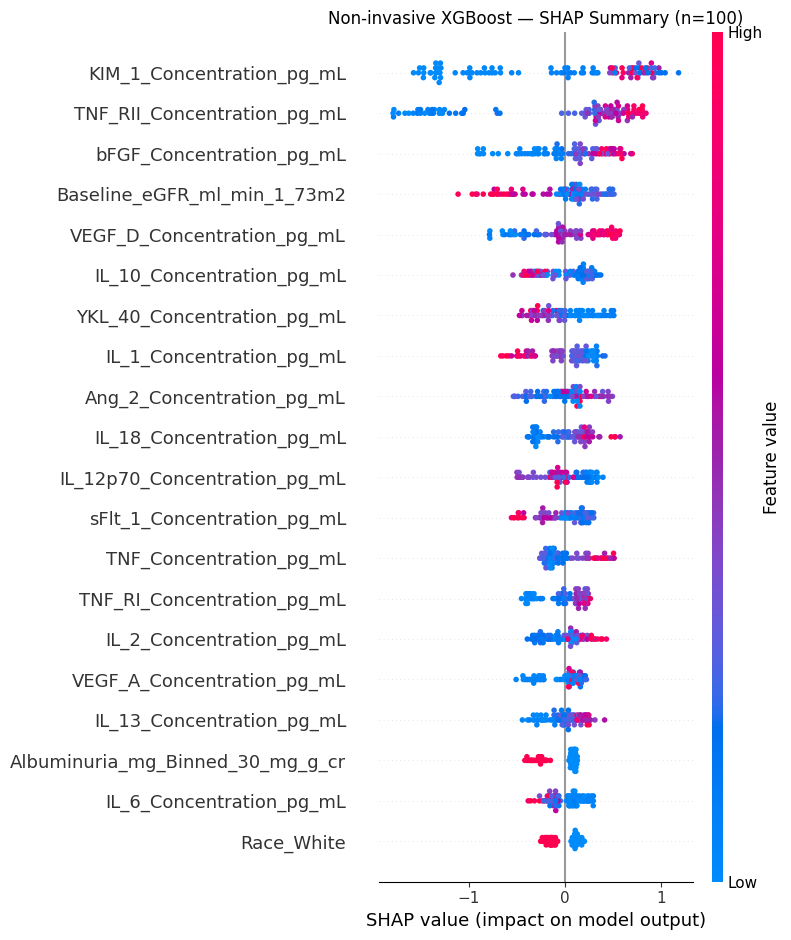

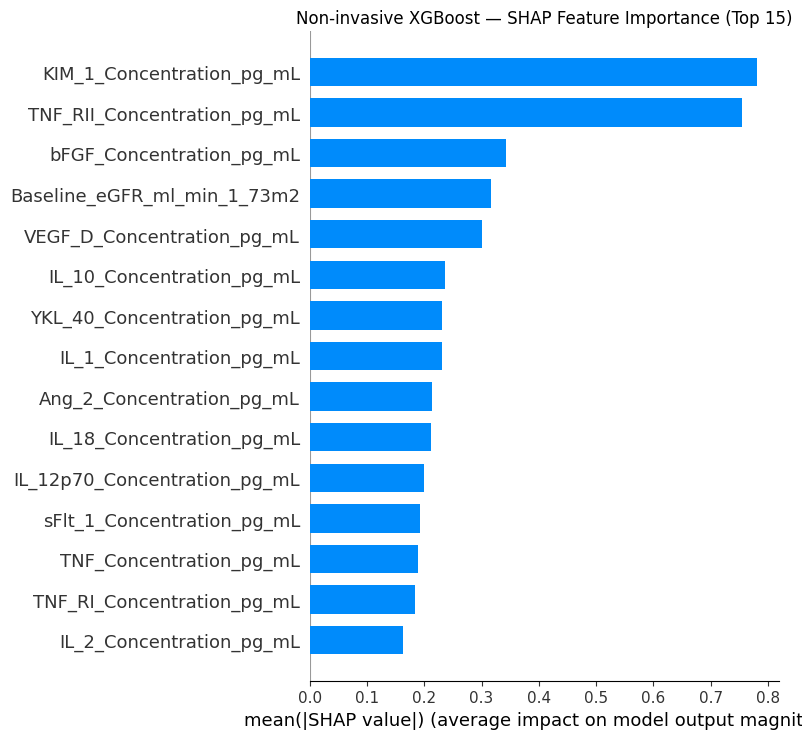

Saved: Non-invasive_XGBoost_SHAP_Features.csv

=== Full (with pathology) — Random Forest ===
Plotting SHAP summary...


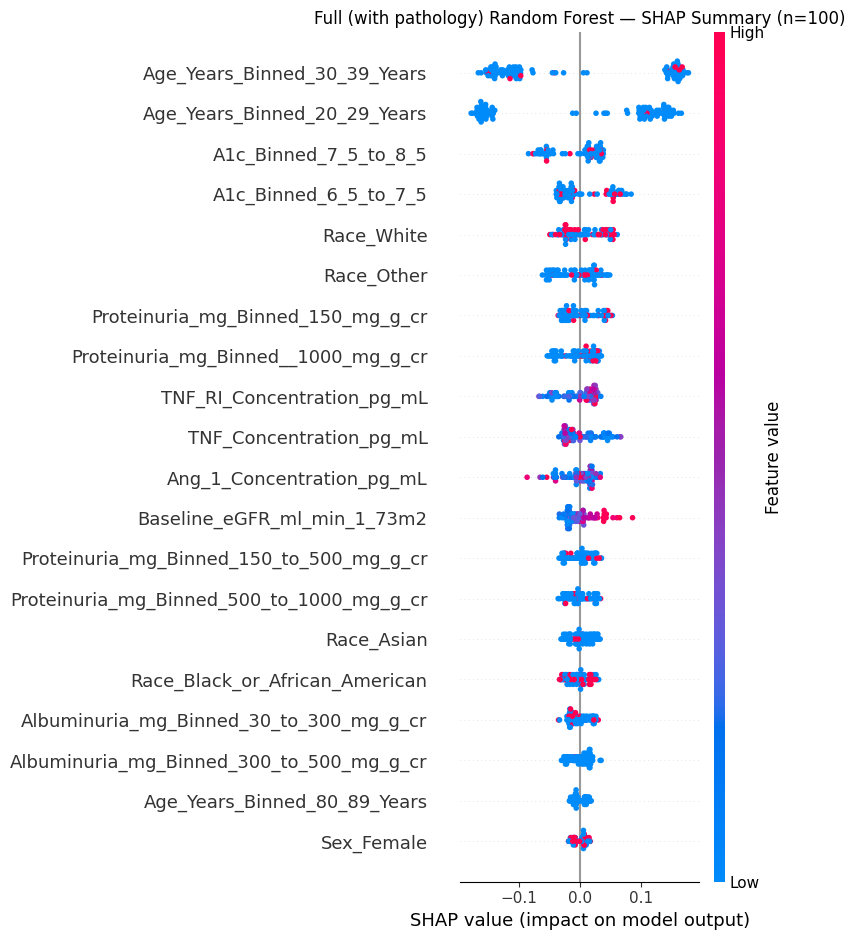

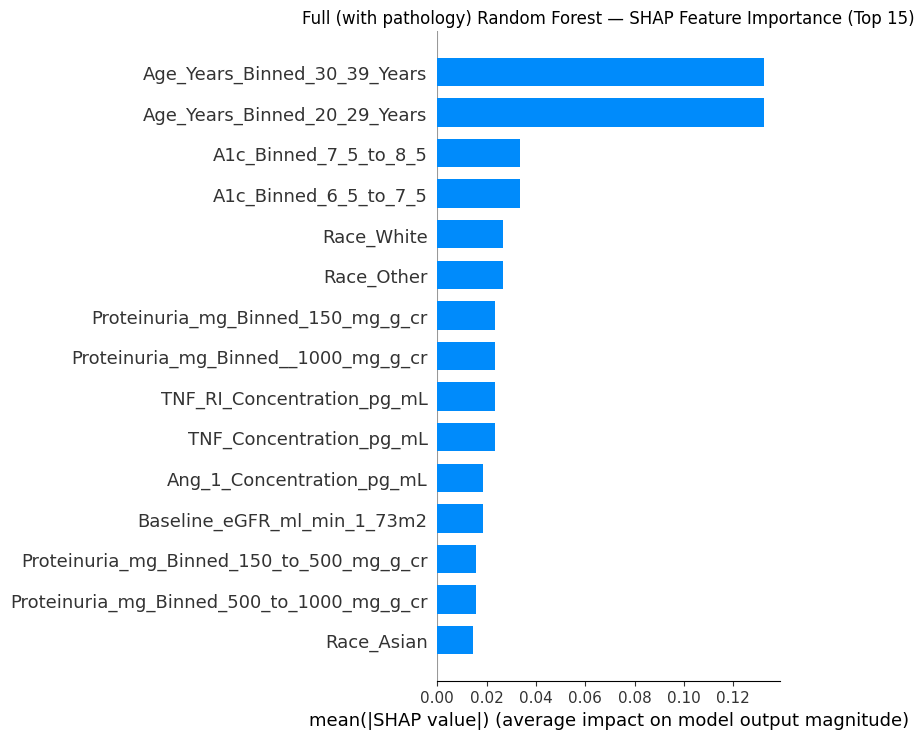

Saved: Full_with_pathology_Random_Forest_SHAP_Features.csv

=== Full (with pathology) — XGBoost ===
Plotting SHAP summary...


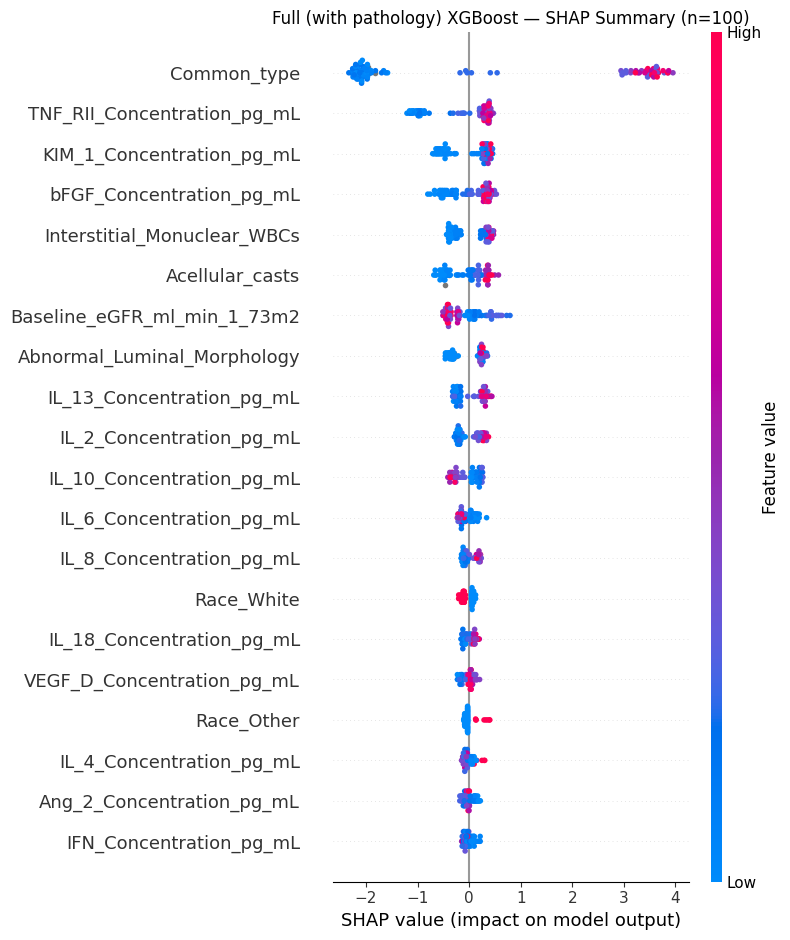

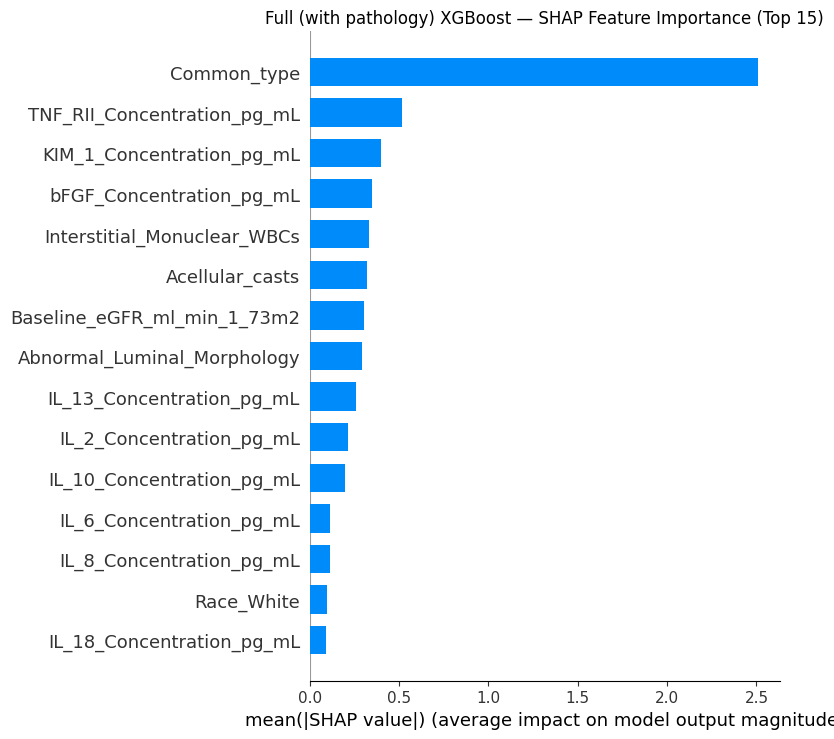

Saved: Full_with_pathology_XGBoost_SHAP_Features.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shap
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


SAMPLE_SIZE = 100  # subsample for SHAP speed
RANDOM_STATE = 42

#  Feature groups
clinical_cols = [
    'Baseline eGFR (ml/min/1.73m2)',
    'Proteinuria (mg) (Binned)',
    'A1c (%) (Binned)',
    'Albuminuria (mg) (Binned)',
    'Age (Years) (Binned)',
    'Sex',
    'Race'
]
biomarker_cols = [c for c in kta_final.columns if 'Concentration' in c]
pathology_cols = [
    'Cortex (%): ', 'Medulla (%): ', 'Common type (%)',
    'Endocrine type (%)', 'Tubular Injury (other than atrophy) (%)',
    'Abnormal Luminal Morphology (%)', 'RBCs (%)',
    'Acellular casts (%)', 'Cellular casts (%)',
    'Interstitial Monuclear WBCs (%)', 'Interstitial Foam Cells (%)',
    'M_RBCs (%)', 'M_Acellular casts (%)', 'M_Cellular casts (%)',
    'M_Interstitial Mononuclear WBCs (%)' if 'M_Interstitial Mononuclear WBCs (%)' in kta_final.columns else 'M_Interstitial Monuclear WBCs (%)',
    'M_Interstitial Foam Cells (%)',
    'Tubulointerstitial Amyloidosis (%)'
]

# Datasets
X_noninvasive = kta_final[clinical_cols + biomarker_cols]
X_full        = kta_final[clinical_cols + biomarker_cols + pathology_cols]
y             = kta_final['Fibrosis_Class']

datasets = {
    "Non-invasive": X_noninvasive,
    "Full (with pathology)": X_full
}


def clean_cols(df: pd.DataFrame) -> pd.DataFrame:
    """Make column names safe and consistent across models."""
    df = df.copy()
    df.columns = (
        df.columns
          .str.replace(r'[\[\]<>():%]', '', regex=True)
          .str.replace(r'[^A-Za-z0-9_]+', '_', regex=True)
          .str.strip('_')
    )
    return df

def encode_and_clean(X: pd.DataFrame) -> pd.DataFrame:
    """One-hot encode categoricals and clean column names."""
    cat_cols = [c for c in [
        'Proteinuria (mg) (Binned)',
        'A1c (%) (Binned)',
        'Albuminuria (mg) (Binned)',
        'Age (Years) (Binned)',
        'Sex',
        'Race'
    ] if c in X.columns]
    X_enc = pd.get_dummies(X, columns=cat_cols, dummy_na=False)
    X_enc = clean_cols(X_enc)
    return X_enc

def ensure_2d(a: np.ndarray) -> np.ndarray:
    """Guarantee shape = (n_samples, n_features)."""
    a = np.asarray(a)
    if a.ndim == 1:
        a = a.reshape(-1, 1)
    elif a.ndim > 2:
        a = a.reshape(a.shape[0], -1)
    return a

def pick_positive_class(shap_values_all):
    """Return SHAP values for positive class (binary) as 2D array."""
    # shap_values_all may be:
    # - list of length 2: [class0, class1] each (n_samples, n_features)
    # - single array      (n_samples, n_features)
    if isinstance(shap_values_all, list):
        sv = shap_values_all[1]
    else:
        sv = shap_values_all
    return ensure_2d(sv)

def align_features_for_plot(shap_vals: np.ndarray, X_feats: pd.DataFrame):
    """Align shapes so summary_plot doesn't crash."""
    n_feat_sv = shap_vals.shape[1]
    n_feat_x  = X_feats.shape[1]
    if n_feat_sv != n_feat_x:
        m = min(n_feat_sv, n_feat_x)
        return shap_vals[:, :m], X_feats.iloc[:, :m]
    return shap_vals, X_feats

def export_mean_abs_shap(shap_vals: np.ndarray, feat_names: list, out_path: str):
    """Save mean |SHAP| per feature, handling any length mismatch safely."""
    shap_vals = ensure_2d(shap_vals)
    m = min(shap_vals.shape[1], len(feat_names))
    df = pd.DataFrame({
        "Feature": feat_names[:m],
        "Mean_SHAP_Impact": np.abs(shap_vals[:, :m]).mean(axis=0)
    }).sort_values("Mean_SHAP_Impact", ascending=False)
    df.to_csv(out_path, index=False)

def run_shap(model, model_label: str, X: pd.DataFrame, dataset_label: str):
    """Fit model, compute SHAP, plot, and export CSV."""
    print(f"\n=== {dataset_label} — {model_label} ===")

    X_enc = encode_and_clean(X)
    model.fit(X_enc, y)

    # Sample for SHAP speed
    n = min(SAMPLE_SIZE, len(X_enc))
    X_sample = X_enc.sample(n, random_state=RANDOM_STATE)

    # SHAP values
    explainer = shap.TreeExplainer(model)
    shap_all  = explainer.shap_values(X_sample)
    shap_vals = pick_positive_class(shap_all)   # (n_samples, n_features)

    # Align shapes for plotting
    shap_vals_plot, X_plot = align_features_for_plot(shap_vals, X_sample)

    # Plots
    print("Plotting SHAP summary...")
    shap.summary_plot(shap_vals_plot, X_plot, show=False)
    plt.title(f"{dataset_label} {model_label} — SHAP Summary (n={n})")
    plt.tight_layout(); plt.show()

    shap.summary_plot(shap_vals_plot, X_plot, plot_type="bar", max_display=15, show=False)
    plt.title(f"{dataset_label} {model_label} — SHAP Feature Importance (Top 15)")
    plt.tight_layout(); plt.show()

    # 7) Export mean |SHAP|
    csv_name = f"{dataset_label.replace(' ', '_').replace('(', '').replace(')', '')}_{model_label.replace(' ', '_')}_SHAP_Features.csv"
    export_mean_abs_shap(shap_vals, list(X_sample.columns), csv_name)
    print(f"Saved: {csv_name}")

# Define Random Forest and XGBoost models
rf = RandomForestClassifier(
    n_estimators=300,
    class_weight='balanced',
    random_state=RANDOM_STATE,
    n_jobs=-1
)

xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)

# SHAP results
for ds_name, X_ds in datasets.items():
    run_shap(rf,  "Random Forest", X_ds, ds_name)
    run_shap(xgb, "XGBoost",       X_ds, ds_name)


#Pathway enrichment analysis

 Final cleaned gene list (4): ['HAVCR1', 'IL10', 'IL2', 'FGF2']
Fewer than 10 genes detected, expanding with prior biologically relevant markers.
Final gene list for enrichment: ['HAVCR1', 'IL10', 'IL2', 'FGF2', 'TNFRSF1A', 'TNFRSF1B', 'IL6', 'IL18', 'LCN2', 'CHI3L1', 'VEGFD', 'PGF']

Top Reactome Pathways:
                                                Term  Adjusted P-value
0             Interleukin-10 Signaling R-HSA-6783783      2.618725e-09
1             Signaling By Interleukins R-HSA-449147      7.459601e-08
2  Interleukin-4 And Interleukin-13 Signaling R-H...      7.459601e-08
3  Cytokine Signaling In Immune System R-HSA-1280215      7.897487e-07
4                         Immune System R-HSA-168256      3.951908e-05
5  VEGF Binds To VEGFR Leading To Receptor Dimeri...      1.121937e-04
6  CD163 Mediating An Anti-Inflammatory Response ...      1.236012e-04
7  TNFs Bind Their Physiological Receptors R-HSA-...      1.211626e-03
8                 Leishmania Infection R-HSA-9658195

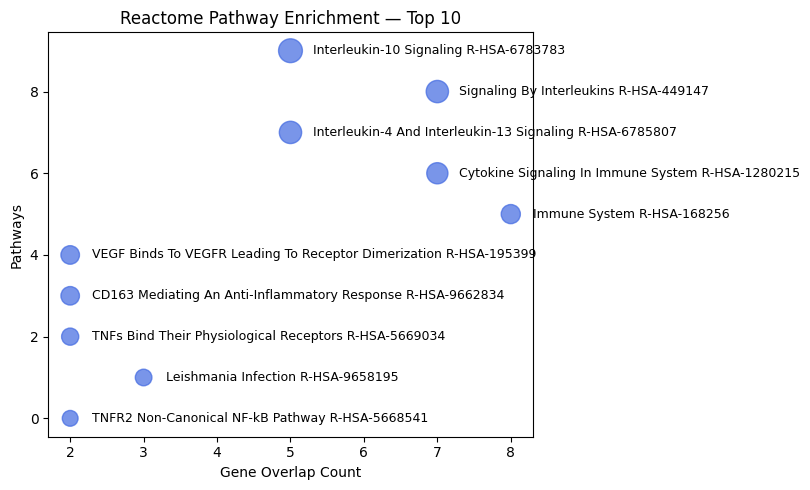

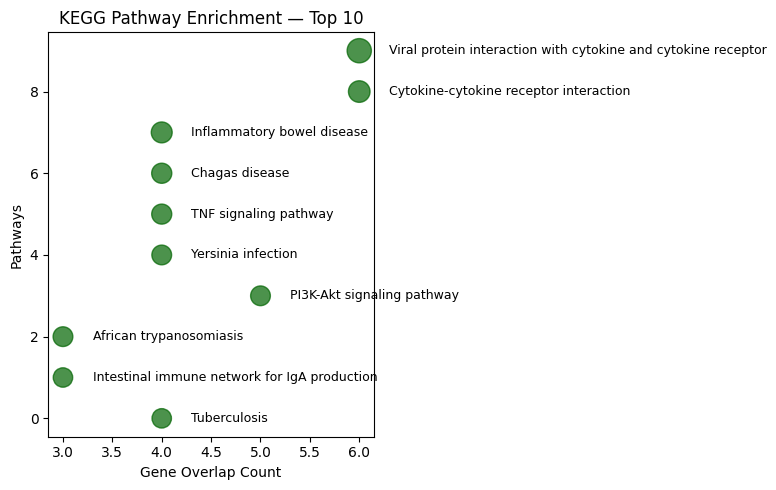

In [ ]:
# Install gseapy
!pip install gseapy

# Import the necessary libraries
import pandas as pd
import gseapy as gp
import re
import numpy as np
import matplotlib.pyplot as plt

# Load top SHAP features
top = pd.read_csv("/content/drive/Shareddrives/Symposium Competition Project/top_SHAP_features.csv")

# Expanded alias-to-gene dictionary (covers your variable formats)
alias_to_gene = {
    'IL-6': 'IL6', 'IL6': 'IL6',
    'IL-8': 'CXCL8', 'IL8': 'CXCL8',
    'IL-10': 'IL10', 'IL10': 'IL10',
    'IL-18': 'IL18', 'IL18': 'IL18',
    'IL-1β': 'IL1B', 'IL1B': 'IL1B',
    'IL-2': 'IL2', 'IL2': 'IL2',
    'IL-4': 'IL4', 'IL4': 'IL4',
    'IL-12p70': 'IL12A', 'IL12p70': 'IL12A',
    'IFN-γ': 'IFNG', 'IFN-g': 'IFNG',

    # TNF signaling
    'TNF-α': 'TNF', 'TNF-a': 'TNF',
    'TNF-RI': 'TNFRSF1A', 'TNFRI': 'TNFRSF1A',
    'TNF-RII': 'TNFRSF1B', 'TNFRII': 'TNFRSF1B',

    # Kidney injury markers
    'KIM-1': 'HAVCR1', 'KIM1': 'HAVCR1',
    'NGAL': 'LCN2',
    'YKL-40': 'CHI3L1', 'CHI3L1': 'CHI3L1',

    # Angiogenesis
    'VEGF-A': 'VEGFA', 'VEGFA': 'VEGFA',
    'VEGF-C': 'VEGFC', 'VEGFC': 'VEGFC',
    'VEGF-D': 'VEGFD', 'VEGFD': 'VEGFD',
    'sFlt-1': 'FLT1', 'FLT1': 'FLT1',
    'PlGF': 'PGF', 'PGF': 'PGF',
    'Tie-2': 'TEK', 'TEK': 'TEK',
    'Ang-1': 'ANGPT1', 'ANGPT1': 'ANGPT1',
    'Ang-2': 'ANGPT2', 'ANGPT2': 'ANGPT2',
    'bFGF': 'FGF2', 'FGF2': 'FGF2',

    # Chemokines
    'MCP-1': 'CCL2', 'MCP1': 'CCL2'
}

def clean_name(x):
    x = str(x)
    x = re.sub(r'[\(\)_/<>\-\s]+', '_', x)  # normalize symbols
    x = x.replace('Concentration', '').replace('pgmL', '').strip('_')
    return x

top['Cleaned'] = top['Feature'].apply(clean_name)

top['Gene'] = top['Cleaned'].apply(lambda x: alias_to_gene.get(x, None))

genes = [g for g in top['Gene'].dropna().unique().tolist() if len(g) > 2]
print(f" Final cleaned gene list ({len(genes)}):", genes)

if len(genes) < 10:
    print("Fewer than 10 genes detected, expanding with prior biologically relevant markers.")
    extra_genes = ['TNFRSF1A', 'TNFRSF1B', 'IL6', 'IL10', 'IL18', 'HAVCR1', 'LCN2', 'CHI3L1', 'VEGFD', 'PGF']
    genes = list(dict.fromkeys(genes + extra_genes))

print("Final gene list for enrichment:", genes)

reactome = gp.enrichr(
    gene_list=genes,
    gene_sets=['Reactome_2022'],
    organism='Human',
    outdir=None
)
kegg = gp.enrichr(
    gene_list=genes,
    gene_sets=['KEGG_2021_Human'],
    organism='Human',
    outdir=None
)

if not reactome.results.empty:
    print("\nTop Reactome Pathways:")
    print(reactome.results[['Term', 'Adjusted P-value']].head(10))
else:
    print("No significant Reactome pathways found.")

if not kegg.results.empty:
    print("\nTop KEGG Pathways:")
    print(kegg.results[['Term', 'Adjusted P-value']].head(10))
else:
    print("No significant KEGG pathways found.")

# Plot
for name, df, color in [('Reactome', reactome.results, 'royalblue'), ('KEGG', kegg.results, 'darkgreen')]:
    if not df.empty:
        df = df.sort_values('Adjusted P-value').head(10)
        df['OverlapCount'] = df['Overlap'].apply(lambda s: int(str(s).split('/')[0]))
        df['neglog10FDR'] = -np.log10(df['Adjusted P-value'])
        plt.figure(figsize=(8, 5))
        plt.scatter(df['OverlapCount'], range(len(df))[::-1],
                    s=80 + df['neglog10FDR']*25, alpha=0.7, color=color)
        for i, name_ in enumerate(df['Term']):
            plt.text(df['OverlapCount'].iloc[i] + 0.3, len(df) - 1 - i, name_, va='center', fontsize=9)
        plt.xlabel("Gene Overlap Count")
        plt.ylabel("Pathways")
        plt.title(f"{name} Pathway Enrichment — Top 10")
        plt.tight_layout()
        plt.show()


Top biomarker list saved as Top_Biomarkers_List.csv
                     Feature  RF_Importance  XGB_Importance  Mean_Importance  \
0    KIM1_Concentration_pgmL       0.045156        0.038458         0.041807   
1   TNFRI_Concentration_pgmL       0.048695        0.029787         0.039241   
2  TNFRII_Concentration_pgmL       0.030523        0.046342         0.038432   
3    NGAL_Concentration_pgmL       0.034746        0.000000         0.017373   
4     TNF_Concentration_pgmL       0.031377        0.000000         0.015688   
5    IL10_Concentration_pgmL       0.000000        0.026647         0.013324   
6   VEGFD_Concentration_pgmL       0.023363        0.000000         0.011682   
7    PlGF_Concentration_pgmL       0.022758        0.000000         0.011379   
8    MCP1_Concentration_pgmL       0.020941        0.000000         0.010471   
9     IFN_Concentration_pgmL       0.019879        0.000000         0.009939   

   SHAP_Importance  
0         0.151765  
1         0.047389  
2   

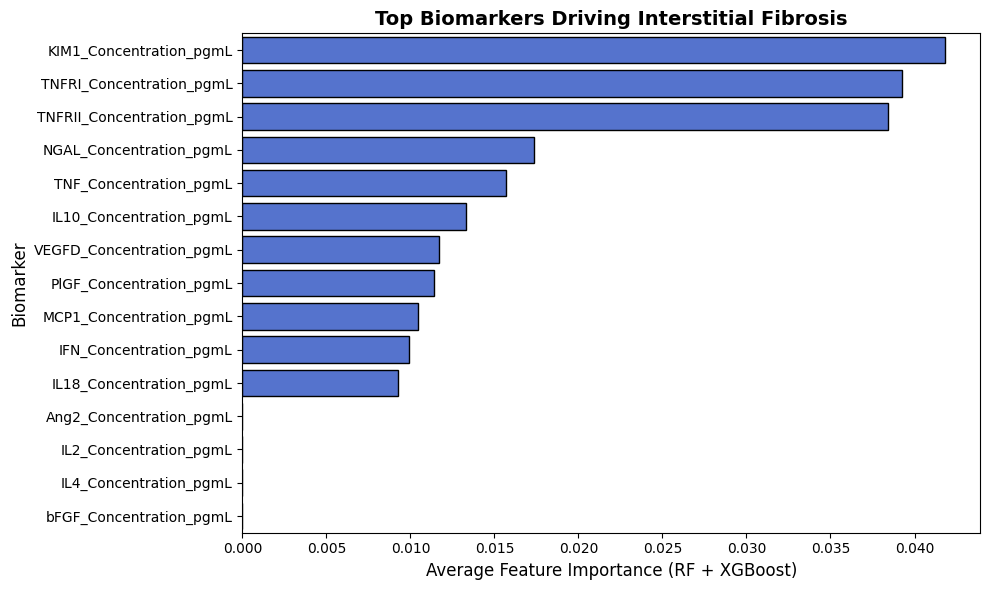

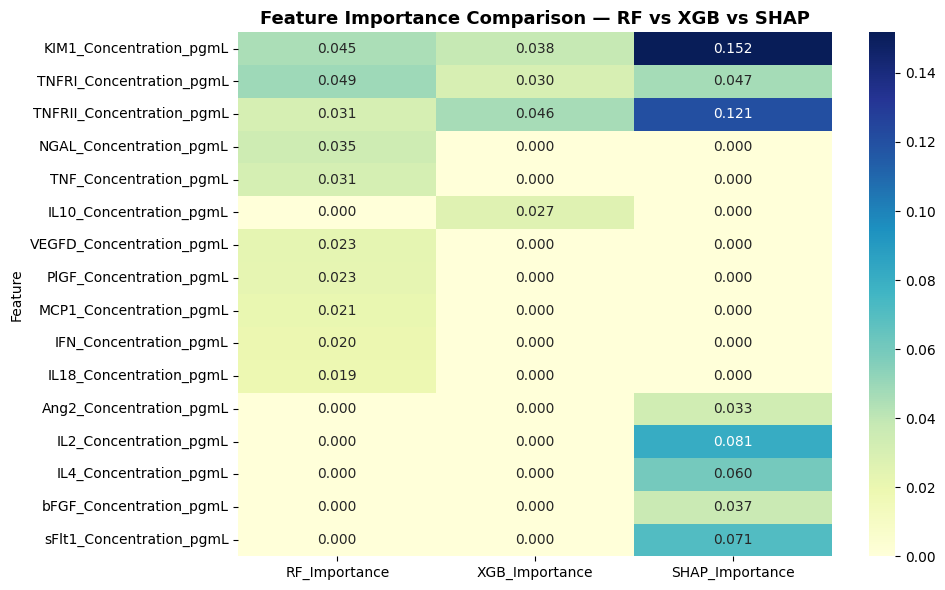

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import numpy as np

# Random Forest
rf_importances = pd.Series(kta_rf.feature_importances_, index=X_train_scaled.columns)
rf_top = rf_importances.sort_values(ascending=False).head(15).reset_index()
rf_top.columns = ["Feature", "RF_Importance"]

# XGBoost
xgb_importances = pd.Series(kta_xgb.feature_importances_, index=X_train_scaled.columns)
xgb_top = xgb_importances.sort_values(ascending=False).head(15).reset_index()
xgb_top.columns = ["Feature", "XGB_Importance"]

# Merge both
merged_imp = pd.merge(rf_top, xgb_top, on="Feature", how="outer").fillna(0)
merged_imp["Mean_Importance"] = merged_imp[["RF_Importance", "XGB_Importance"]].mean(axis=1)
merged_imp = merged_imp.sort_values("Mean_Importance", ascending=False).reset_index(drop=True)

# SHAP IMPORTANCE
try:
    shap_vals = shap.TreeExplainer(kta_xgb).shap_values(X_test_scaled)
    if isinstance(shap_vals, list):
        shap_vals = shap_vals[1]
    shap_importance = np.abs(shap_vals).mean(axis=0)
    shap_df = pd.DataFrame({
        "Feature": X_test_scaled.columns,
        "SHAP_Importance": shap_importance
    }).sort_values("SHAP_Importance", ascending=False).head(15)
    merged_imp = pd.merge(merged_imp, shap_df, on="Feature", how="outer").fillna(0)
except Exception as e:
    print("SHAP importance not available:", e)

biomarkers = merged_imp[merged_imp["Feature"].str.contains("Concentration", case=False)]
biomarkers = biomarkers.sort_values("Mean_Importance", ascending=False).reset_index(drop=True)

biomarkers.to_csv("Top_Biomarkers_List.csv", index=False)
print("Top biomarker list saved as Top_Biomarkers_List.csv")
print(biomarkers.head(10))

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=biomarkers.head(15),
    x="Mean_Importance",
    y="Feature",
    color="royalblue",
    edgecolor="black"
)
plt.title("Top Biomarkers Driving Interstitial Fibrosis", fontsize=14, fontweight="bold")
plt.xlabel("Average Feature Importance (RF + XGBoost)", fontsize=12)
plt.ylabel("Biomarker", fontsize=12)
plt.tight_layout()
plt.show()

#  Plot (RF vs XGB vs SHAP)
if "SHAP_Importance" in biomarkers.columns:
    plt.figure(figsize=(10, 6))
    sns.heatmap(
        biomarkers.set_index("Feature")[["RF_Importance", "XGB_Importance", "SHAP_Importance"]],
        annot=True, fmt=".3f", cmap="YlGnBu"
    )
    plt.title("Feature Importance Comparison — RF vs XGB vs SHAP", fontsize=13, fontweight="bold")
    plt.tight_layout()
    plt.show()
